<a href="https://colab.research.google.com/github/juanserrano90/codelatam/blob/main/DataPreparation/spike_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>  Analysis on Telluric lines  </h1>

<center> Created on November 18th, 2024

Last modified on November 20th, 2024

Author: Paula GM </center>


---

The purpose of this notebook is to perform a statistical analysis of the Telluric lines present in the provided sn_parquet dataset and determine what should be categorized as a spike.

### Loading file

In [1]:
import sys
from os.path import isfile

import numpy as np
import pandas as pd
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

# from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
url = "https://github.com/juanserrano90/codelatam/raw/main/Data/data/sn_data.parquet"
df_raw = pd.read_parquet(url)

In [4]:
df_raw.describe()

,SN Subtype ID,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,2515.28,2518.69,2522.1,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
count,5001.000000,5001.000000,5001.000000,5001.0,5001.0,5.001000e+03,5001.000000,5001.000000,5001.000000,5001.000000,...,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000,5001.000000,5001.0,5001.0
mean,3.993201,0.655069,36.539334,0.0,0.0,7.998400e-07,0.000005,0.000010,0.000007,0.000019,...,0.000008,0.000093,0.000039,0.000055,0.000027,0.000024,0.00001,0.000005,0.0,0.0
std,5.162127,1.024109,88.017382,0.0,0.0,2.827296e-05,0.000130,0.000244,0.000330,0.000641,...,0.005317,0.004881,0.003690,0.002672,0.001601,0.001002,0.00043,0.000113,0.0,0.0
min,0.000000,0.000000,-82.700000,0.0,0.0,0.000000e+00,-0.002000,-0.003000,-0.008000,-0.005000,...,-0.059000,-0.038000,-0.059000,-0.021000,-0.012000,-0.008000,-0.00300,-0.001000,0.0,0.0
25%,0.000000,0.000000,-0.200000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
50%,1.000000,0.000000,11.900000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
75%,8.000000,1.000000,36.100000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
max,16.000000,3.000000,1103.000000,0.0,0.0,1.000000e-03,0.004000,0.009000,0.015000,0.025000,...,0.107000,0.153000,0.071000,0.052000,0.036000,0.022000,0.00900,0.002000,0.0,0.0


In [5]:
df_raw.head()

,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,2515.28,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
SN Name,,,,,,,,,,,,,,,,,,,,,
sn2008ar,Ia-norm,0,Ia,0,-8.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-7.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-6.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-4.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-3.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
wavelength = np.array([float(c) for c in df_raw.columns[5:]])

### Defining outlier identification function

In [7]:
# -- Create function to identify outliers (possible spikes) using a (centered) rolling mean
def detect_outliers(spectrum, window_size=15, sigma_threshold=3):
    """
    Detects spikes in a single spectrum using a  centered rolling mean method to
    consider all the local context. Outliers are determined if their z_score is
    greater than sigma_threshold for the given window_size.

    Parameters:
    - spectrum (array-like): The spectrum data.
    - window_size (int): The size of the rolling window.
    - sigma_threshold (float): The number of standard deviations above which a
                               value is considered an outlier.

    Returns:
    - outliers_indices (list): List of indices where outliers were detected.
    - outliers_z_scores (list): List of z_scores for the detected outliers.
    - outliers_values (list): List of values for the detected outliers.
    """
    # Error handling datatype
    if not isinstance(spectrum, np.ndarray):
        raise TypeError("Input must be a numpy array")

    # Convert spectrum to a pandas Series (for rolling operations)
    spectrum = pd.Series(spectrum)

    # Calculate the rolling mean
    rolling_mean = spectrum.rolling(window=window_size, center=True).mean()

    # Calculate the rolling standard deviation
    rolling_std = spectrum.rolling(window=window_size, center=True).std()

    # Calculate absolute value of z_score
    z_score = ((spectrum - rolling_mean)/rolling_std).abs()

    # Identify outliers: z_score > sigma_threshold
    outliers_indices = spectrum.index[z_score > sigma_threshold].tolist()
    outliers_z_scores = z_score[z_score > sigma_threshold].tolist()
    outliers_values = spectrum[z_score > sigma_threshold].tolist()

    return outliers_indices, outliers_z_scores, outliers_values


### Testing the function

Indices of outliers: [12, 35, 67]
Z-scores of outliers: [3.03289574009818, 2.647698837625919, 3.4777880949955287]
Values of outliers: [4.770346307053618, -3.021040774997609, 9.599903311390277]


Text(0.5, 1.0, 'Detected Outliers')

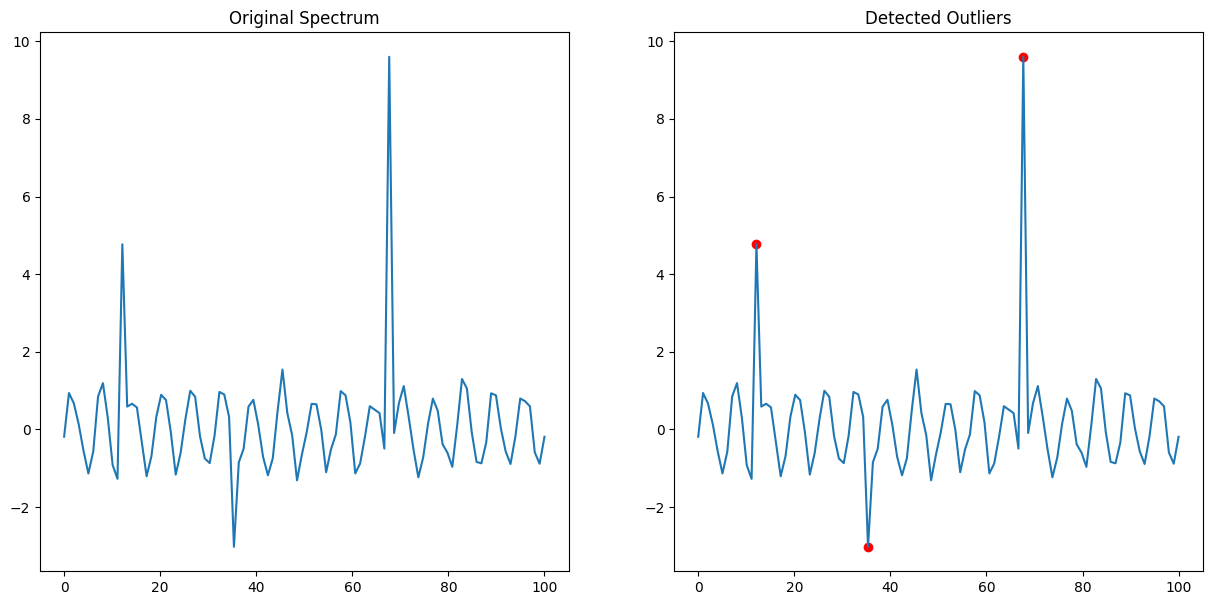

In [8]:
# -- Testing detect_outliers function
x = np.linspace(0, 100, 100)
test_array = np.sin(x)
noise = np.random.normal(0, 0.2, len(test_array))
# --spikes
test_array[12] = 5
test_array[35] = -3
test_array[67] = 10
test_array += noise

indices, z_scores, values = detect_outliers(test_array, sigma_threshold=2.5)

print(f'Indices of outliers: {indices}')
print(f'Z-scores of outliers: {z_scores}')
print(f'Values of outliers: {values}')

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(x, test_array)
ax[0].set_title('Original Spectrum')
ax[1].plot(x, test_array)
ax[1].scatter(x[indices], test_array[indices], color='red')
ax[1].set_title('Detected Outliers')

Indices of outliers: [333, 754, 757]
Z-scores of outliers: [3.417312875268275, 3.1707598900741982, 3.072809509042449]
Values of outliers: [0.608, -0.213, -0.203]


Text(0.5, 1.0, 'Detected Outliers')

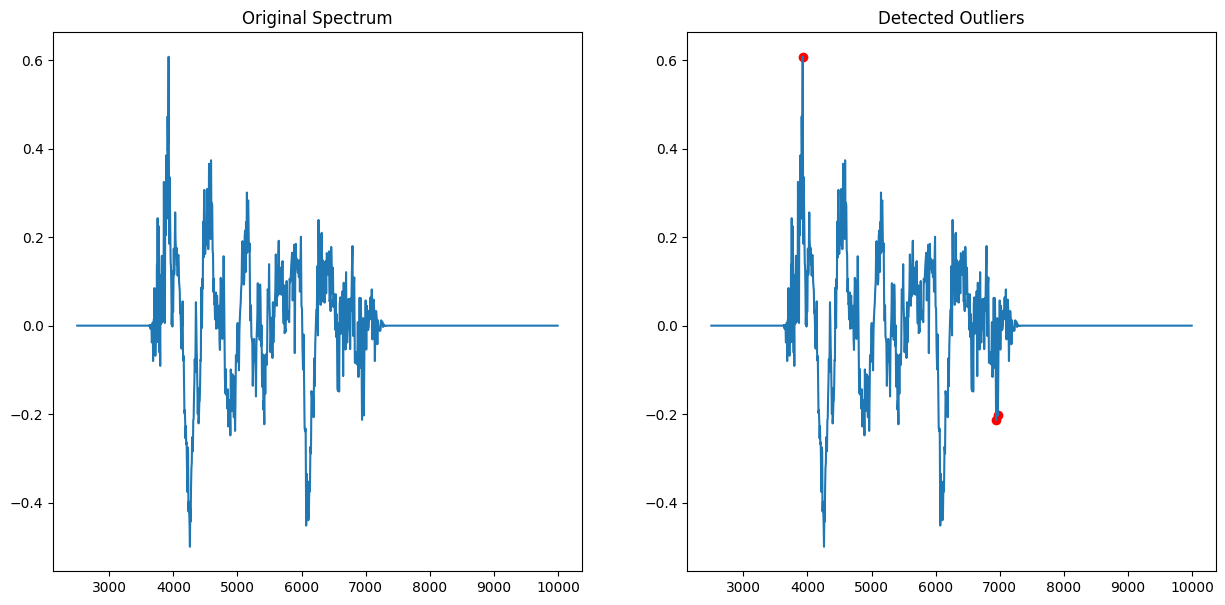

In [9]:
# -- Testing detect_outliers function for first row of df_raw
test_spectrum = df_raw.iloc[456,5:].values

indices, z_scores, values = detect_outliers(test_spectrum, window_size=100, sigma_threshold=3)

print(f'Indices of outliers: {indices}')
print(f'Z-scores of outliers: {z_scores}')
print(f'Values of outliers: {values}')

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(wavelength, test_spectrum)
ax[0].set_title('Original Spectrum')
ax[1].plot(wavelength, test_spectrum)
ax[1].scatter(wavelength[indices], test_spectrum[indices], color='red')
ax[1].set_title('Detected Outliers')

### Visualizing outliers with various window_size and sigma thresholds

In [10]:
# --Create list to compare number of spectra with outliers
num_of_spectra_array = []

#### Window: 50, sigma: 3

Number of spectra with outliers: 1049


<ipython-input-11-8e00db32c969>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delay = df_raw['Spectral Phase'][i]


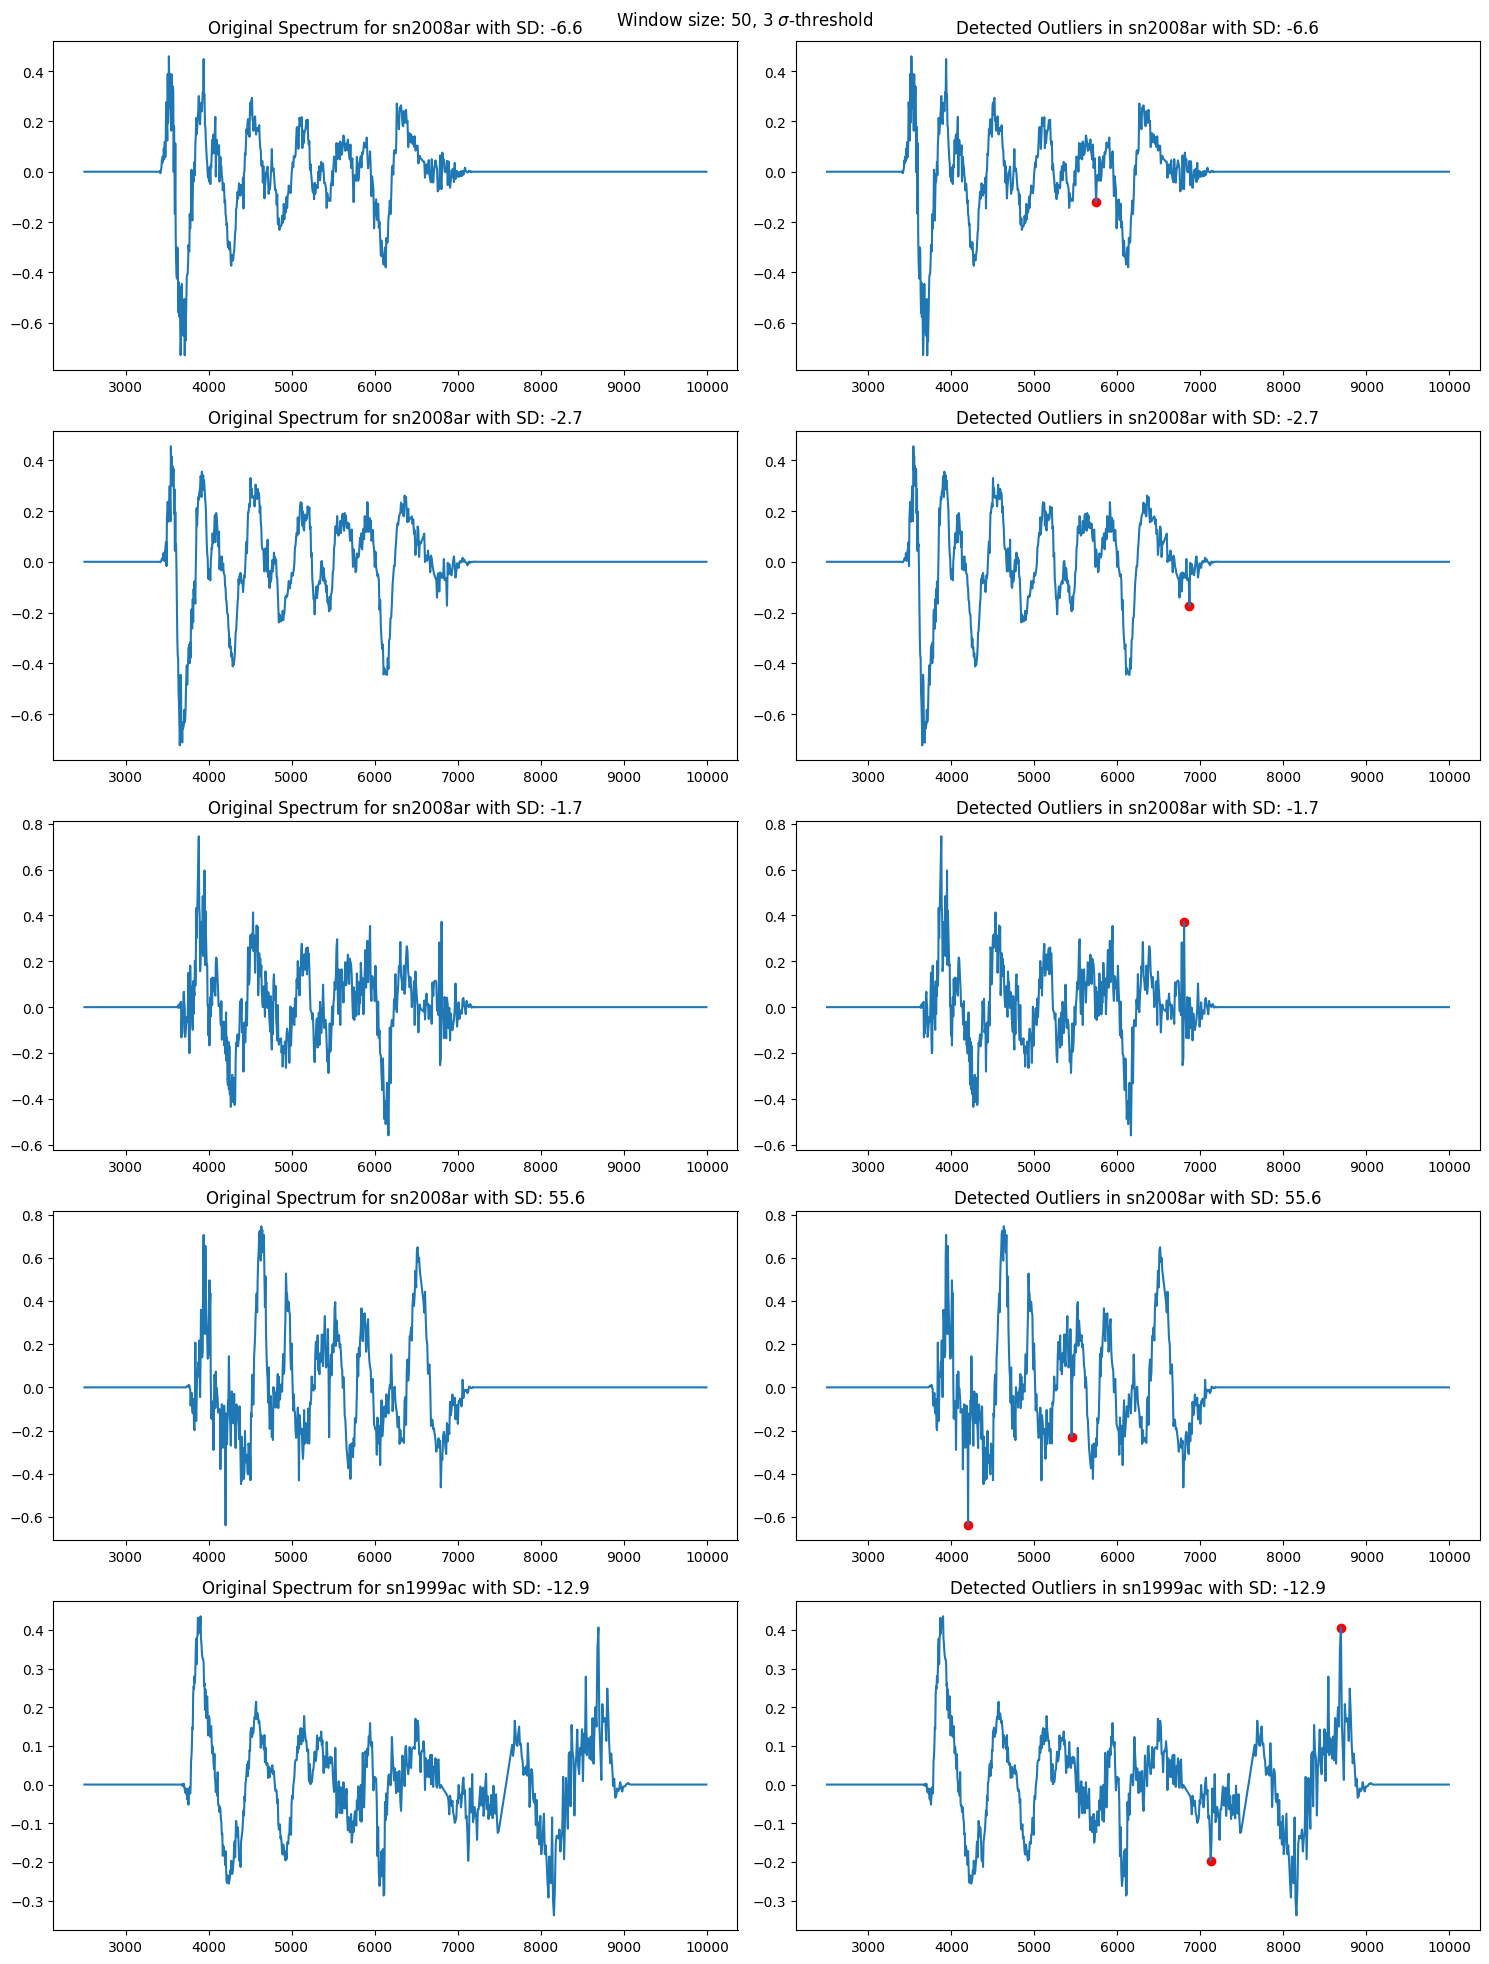

In [11]:
# --Calculate the number of outliers per spectra using a window size of 100 and
# --sigma threshold of 3
window_size = 50
sigma_threshold = 3

outliers_per_spectrum = []
outliers_indx_per_spectrum = []
z_scores_per_spectrum = []
values_per_spectrum = []
spectrum_index = []

for i in range(len(df_raw)):
    test_spectrum = df_raw.iloc[i,5:].values
    indices, z_scores, values = detect_outliers(test_spectrum,
                                                window_size=window_size,
                                                sigma_threshold=sigma_threshold)
    outliers_per_spectrum.append(len(indices))
    outliers_indx_per_spectrum.append(indices)
    z_scores_per_spectrum.append(z_scores)
    values_per_spectrum.append(values)
    spectrum_index.append(i)

# --Count number of spectra with outliers
spectrum_index = np.array(spectrum_index)
outliers_per_spectrum = np.array(outliers_per_spectrum)
num_of_spectra = len(spectrum_index[outliers_per_spectrum > 0])
num_of_spectra_array.append(num_of_spectra)
print(f'Number of spectra with outliers: {num_of_spectra}')
spectra_with_outliers = spectrum_index[outliers_per_spectrum > 0]

# --Create subplots for the first 5 indices in spectra_with_outliers
fig, ax = plt.subplots(5, 2, figsize=(15, 20))

# --Add figure title
fig.suptitle(r'Window size: {0}, {1} $\sigma$-threshold'.format(window_size,
                                                                   sigma_threshold))

# --Loop through the first 5 indices in spectra_with_outliers
for idx, i in enumerate(spectra_with_outliers[:5]):
    spectrum = df_raw.iloc[i, 5:].values
    name = df_raw.index[i]
    delay = df_raw['Spectral Phase'][i]

    # --Plot original spectrum
    ax[idx, 0].plot(wavelength, spectrum)
    ax[idx, 0].set_title(f'Original Spectrum for {name} with SD: {delay}')

    # --Detect outliers (modify indices detection as per your existing logic)
    indices = outliers_indx_per_spectrum[i]

    # --Plot spectrum with detected outliers
    ax[idx, 1].plot(wavelength, spectrum)
    ax[idx, 1].scatter(wavelength[indices], spectrum[indices], color='red')
    ax[idx, 1].set_title(f'Detected Outliers in {name} with SD: {delay}')


# --Show the plots
plt.tight_layout()
plt.show()

#### Window: 50, sigma: 4

Number of spectra with outliers: 224


<ipython-input-12-d8548a8aae25>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delay = df_raw['Spectral Phase'][i]


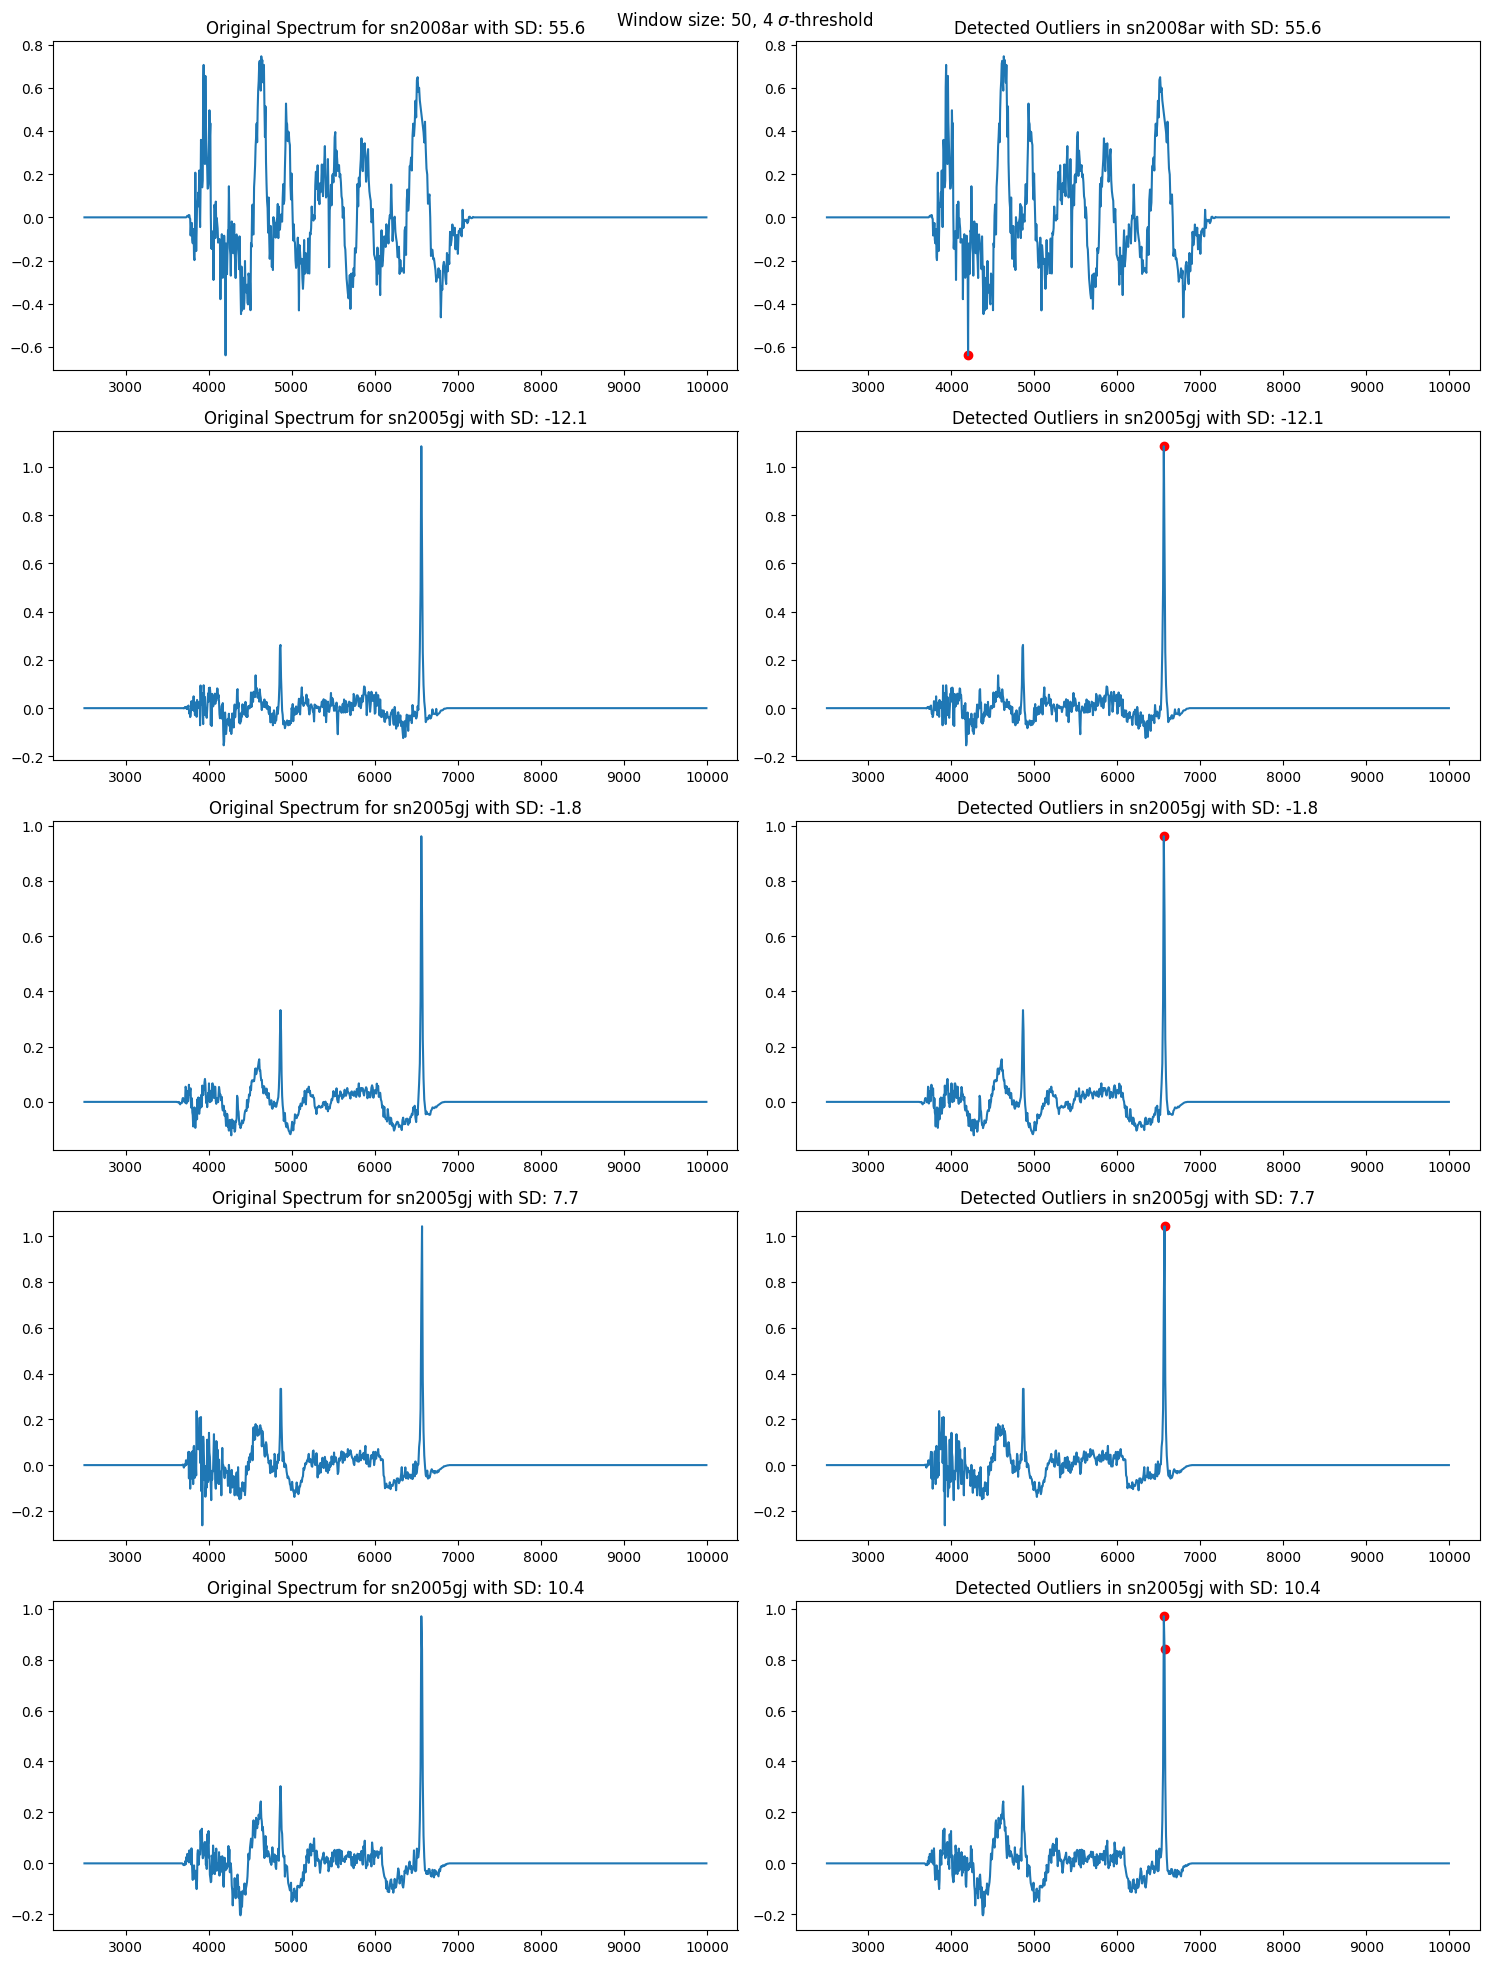

In [12]:
# --Calculate the number of outliers per spectra using a window size of 100 and
# --sigma threshold of 3
window_size = 50
sigma_threshold = 4

outliers_per_spectrum = []
outliers_indx_per_spectrum = []
z_scores_per_spectrum = []
values_per_spectrum = []
spectrum_index = []

for i in range(len(df_raw)):
    test_spectrum = df_raw.iloc[i,5:].values
    indices, z_scores, values = detect_outliers(test_spectrum,
                                                window_size=window_size,
                                                sigma_threshold=sigma_threshold)
    outliers_per_spectrum.append(len(indices))
    outliers_indx_per_spectrum.append(indices)
    z_scores_per_spectrum.append(z_scores)
    values_per_spectrum.append(values)
    spectrum_index.append(i)

# --Count number of spectra with outliers
spectrum_index = np.array(spectrum_index)
outliers_per_spectrum = np.array(outliers_per_spectrum)
num_of_spectra = len(spectrum_index[outliers_per_spectrum > 0])
num_of_spectra_array.append(num_of_spectra)
print(f'Number of spectra with outliers: {num_of_spectra}')
spectra_with_outliers = spectrum_index[outliers_per_spectrum > 0]

# --Create subplots for the first 5 indices in spectra_with_outliers
fig, ax = plt.subplots(5, 2, figsize=(15, 20))

# --Add figure title
fig.suptitle(r'Window size: {0}, {1} $\sigma$-threshold'.format(window_size,
                                                                   sigma_threshold))

# --Loop through the first 5 indices in spectra_with_outliers
for idx, i in enumerate(spectra_with_outliers[:5]):
    spectrum = df_raw.iloc[i, 5:].values
    name = df_raw.index[i]
    delay = df_raw['Spectral Phase'][i]

    # --Plot original spectrum
    ax[idx, 0].plot(wavelength, spectrum)
    ax[idx, 0].set_title(f'Original Spectrum for {name} with SD: {delay}')

    # --Detect outliers (modify indices detection as per your existing logic)
    indices = outliers_indx_per_spectrum[i]

    # --Plot spectrum with detected outliers
    ax[idx, 1].plot(wavelength, spectrum)
    ax[idx, 1].scatter(wavelength[indices], spectrum[indices], color='red')
    ax[idx, 1].set_title(f'Detected Outliers in {name} with SD: {delay}')


# --Show the plots
plt.tight_layout()
plt.show()

#### Window: 50, sigma: 5

Number of spectra with outliers: 51


<ipython-input-13-0a6a9bd9e821>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delay = df_raw['Spectral Phase'][i]


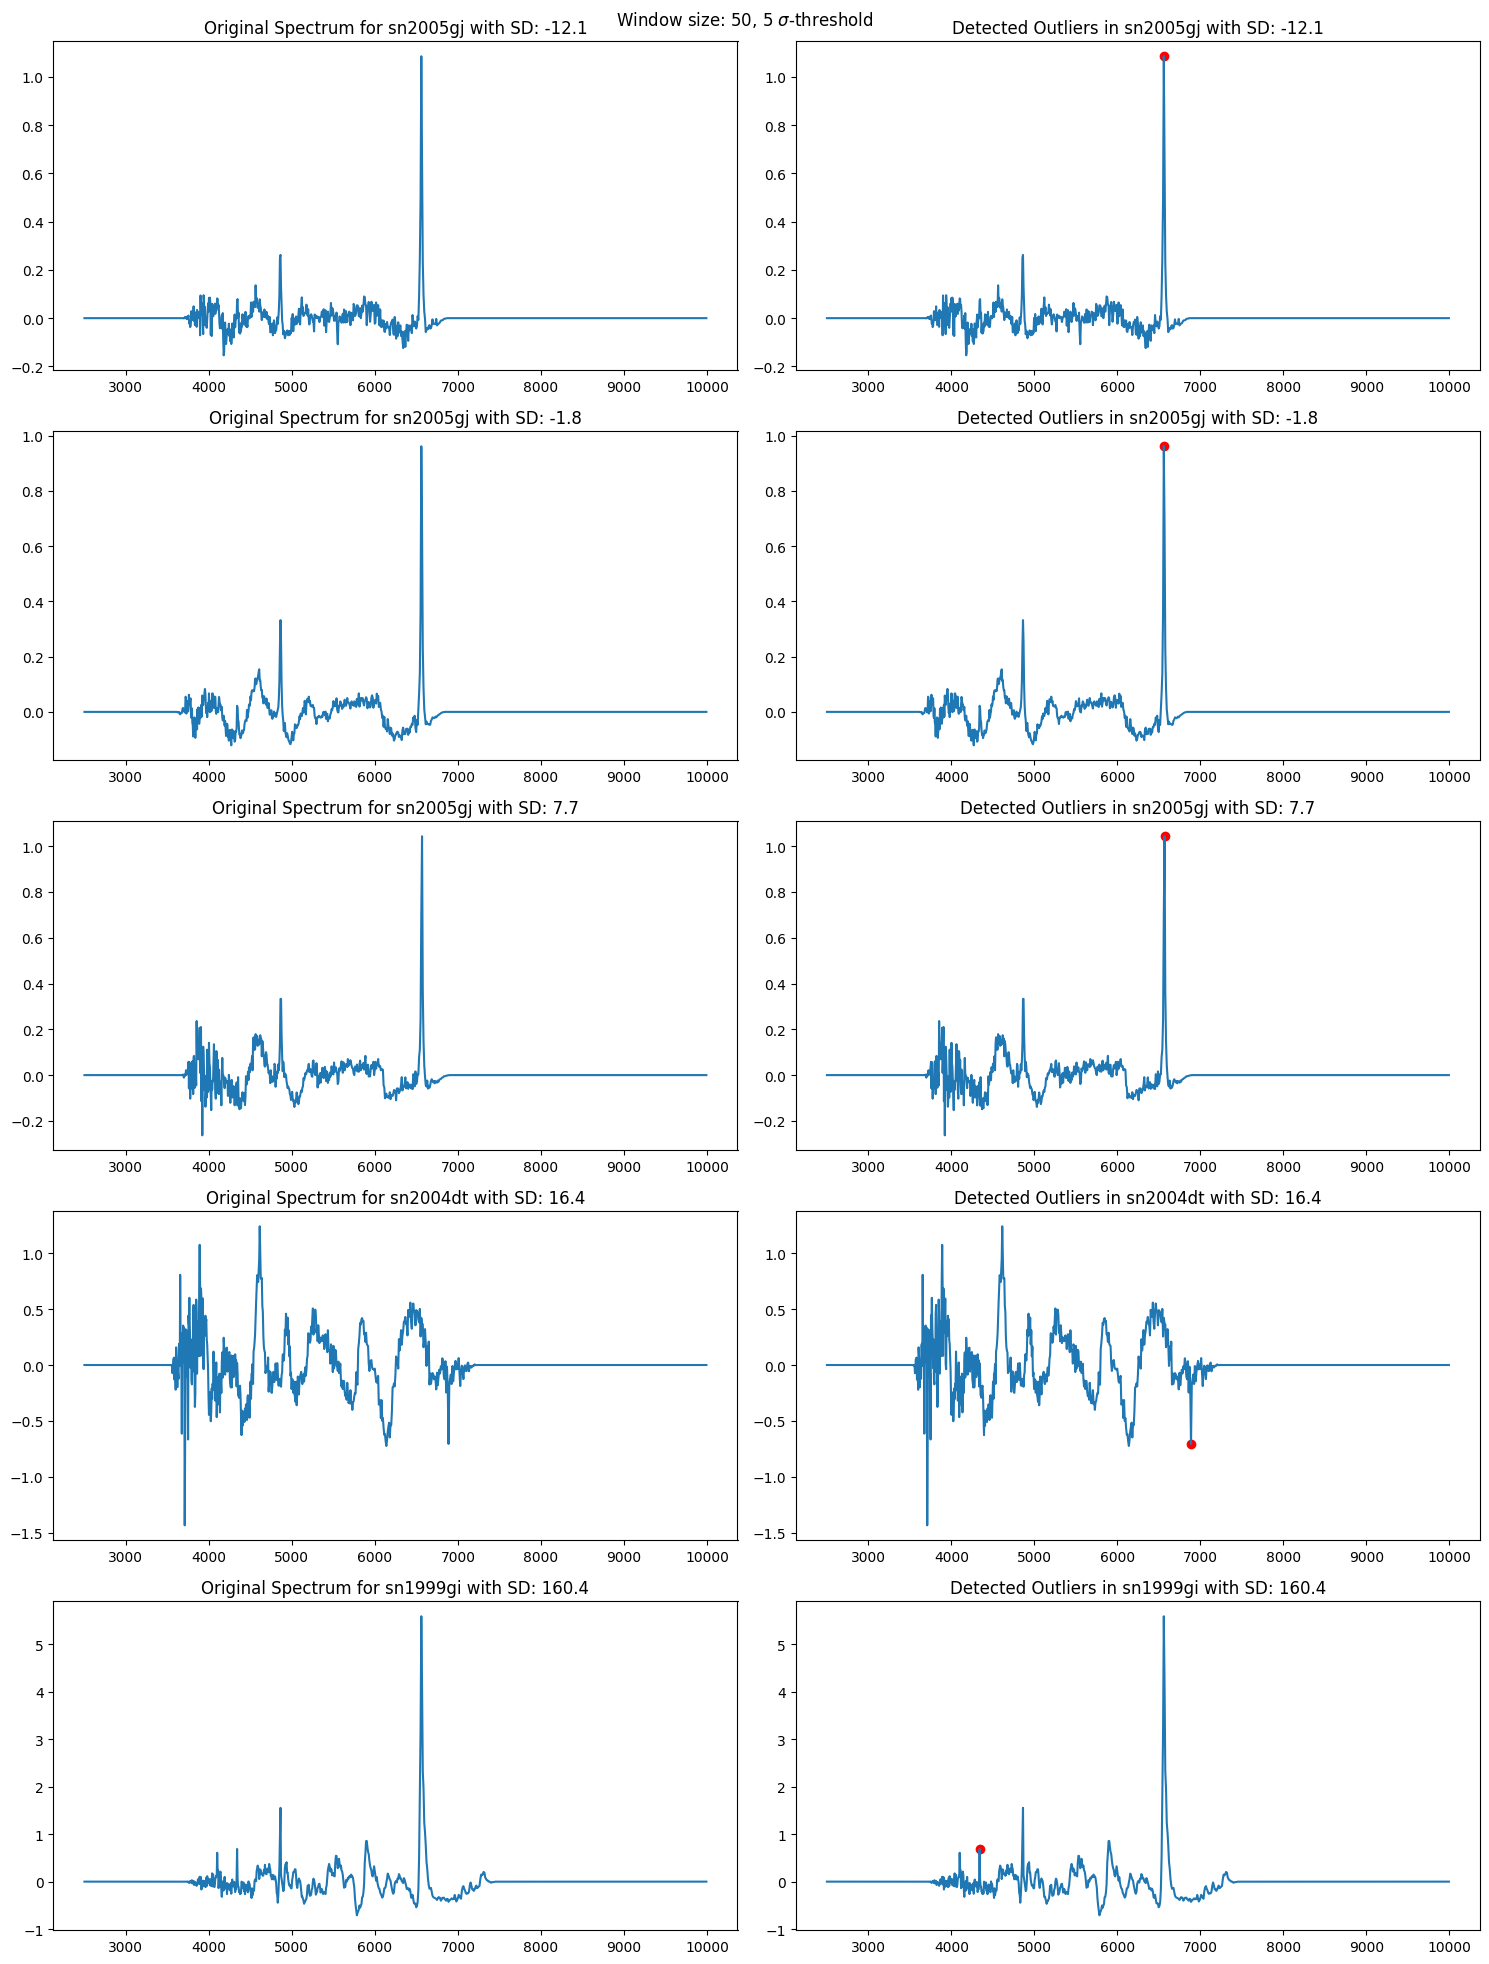

In [13]:
# --Calculate the number of outliers per spectra using a window size of 100 and
# --sigma threshold of 3
window_size = 50
sigma_threshold = 5

outliers_per_spectrum = []
outliers_indx_per_spectrum = []
z_scores_per_spectrum = []
values_per_spectrum = []
spectrum_index = []

for i in range(len(df_raw)):
    test_spectrum = df_raw.iloc[i,5:].values
    indices, z_scores, values = detect_outliers(test_spectrum,
                                                window_size=window_size,
                                                sigma_threshold=sigma_threshold)
    outliers_per_spectrum.append(len(indices))
    outliers_indx_per_spectrum.append(indices)
    z_scores_per_spectrum.append(z_scores)
    values_per_spectrum.append(values)
    spectrum_index.append(i)

# --Count number of spectra with outliers
spectrum_index = np.array(spectrum_index)
outliers_per_spectrum = np.array(outliers_per_spectrum)
num_of_spectra = len(spectrum_index[outliers_per_spectrum > 0])
num_of_spectra_array.append(num_of_spectra)
print(f'Number of spectra with outliers: {num_of_spectra}')
spectra_with_outliers = spectrum_index[outliers_per_spectrum > 0]

# --Create subplots for the first 5 indices in spectra_with_outliers
fig, ax = plt.subplots(5, 2, figsize=(15, 20))

# --Add figure title
fig.suptitle(r'Window size: {0}, {1} $\sigma$-threshold'.format(window_size,
                                                                   sigma_threshold))

# --Loop through the first 5 indices in spectra_with_outliers
for idx, i in enumerate(spectra_with_outliers[:5]):
    spectrum = df_raw.iloc[i, 5:].values
    name = df_raw.index[i]
    delay = df_raw['Spectral Phase'][i]

    # --Plot original spectrum
    ax[idx, 0].plot(wavelength, spectrum)
    ax[idx, 0].set_title(f'Original Spectrum for {name} with SD: {delay}')

    # --Detect outliers (modify indices detection as per your existing logic)
    indices = outliers_indx_per_spectrum[i]

    # --Plot spectrum with detected outliers
    ax[idx, 1].plot(wavelength, spectrum)
    ax[idx, 1].scatter(wavelength[indices], spectrum[indices], color='red')
    ax[idx, 1].set_title(f'Detected Outliers in {name} with SD: {delay}')


# --Show the plots
plt.tight_layout()
plt.show()

#### Window: 100, sigma: 3

Number of spectra with outliers: 1539


<ipython-input-14-edca93c4e663>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delay = df_raw['Spectral Phase'][i]


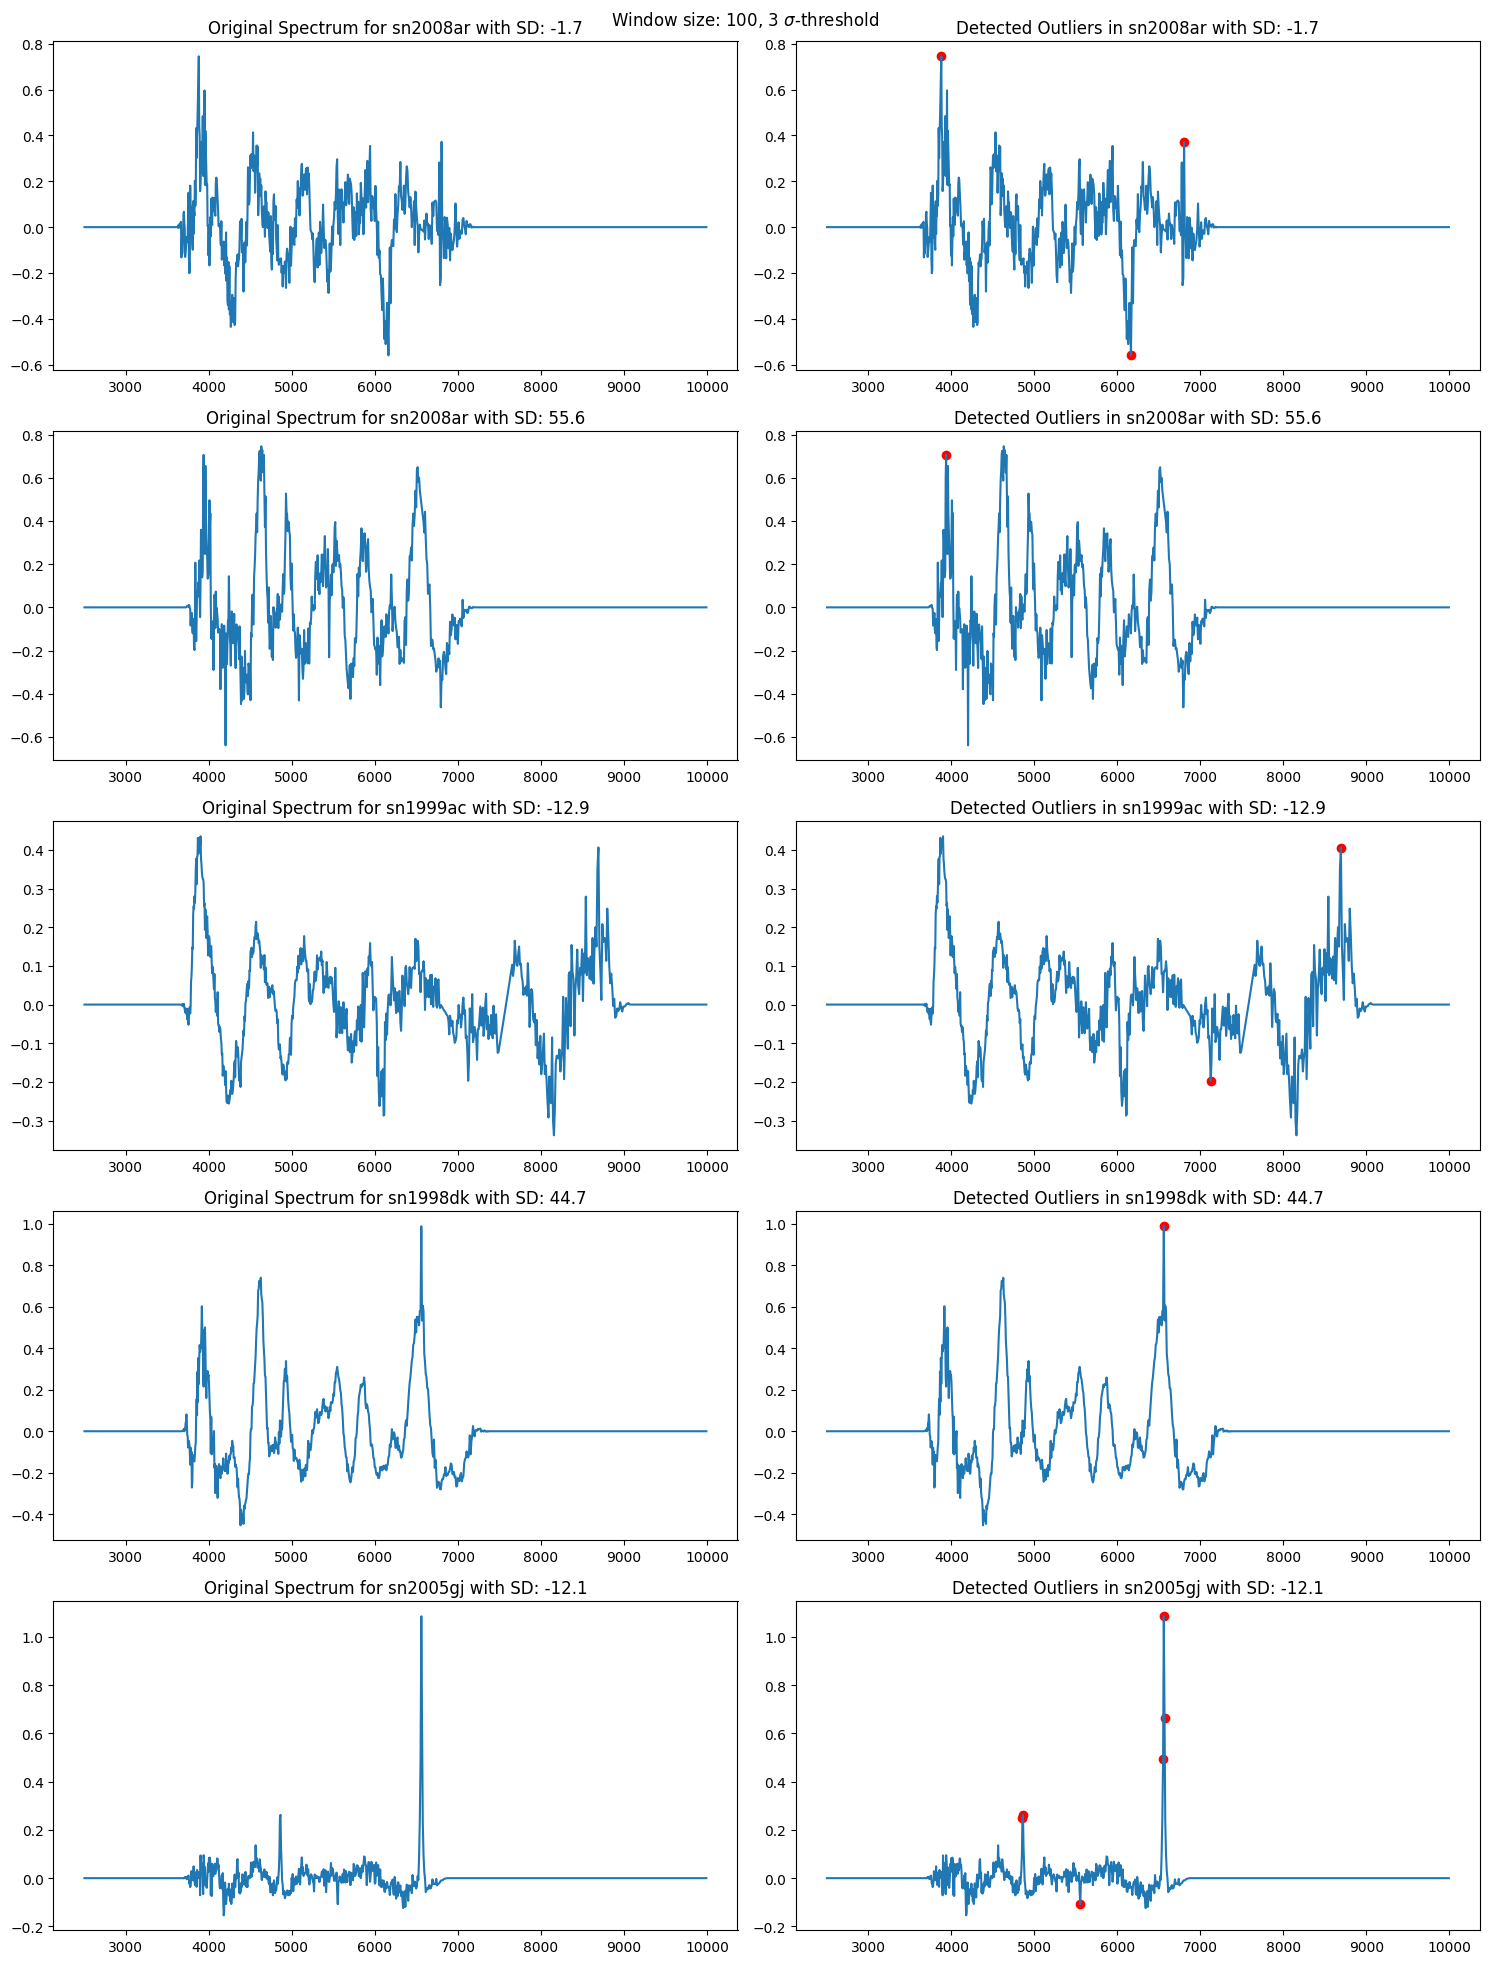

In [14]:
# --Calculate the number of outliers per spectra using a window size of 100 and
# --sigma threshold of 3
window_size = 100
sigma_threshold = 3

outliers_per_spectrum = []
outliers_indx_per_spectrum = []
z_scores_per_spectrum = []
values_per_spectrum = []
spectrum_index = []

for i in range(len(df_raw)):
    test_spectrum = df_raw.iloc[i,5:].values
    indices, z_scores, values = detect_outliers(test_spectrum,
                                                window_size=window_size,
                                                sigma_threshold=sigma_threshold)
    outliers_per_spectrum.append(len(indices))
    outliers_indx_per_spectrum.append(indices)
    z_scores_per_spectrum.append(z_scores)
    values_per_spectrum.append(values)
    spectrum_index.append(i)

# --Count number of spectra with outliers
spectrum_index = np.array(spectrum_index)
outliers_per_spectrum = np.array(outliers_per_spectrum)
num_of_spectra = len(spectrum_index[outliers_per_spectrum > 0])
num_of_spectra_array.append(num_of_spectra)
print(f'Number of spectra with outliers: {num_of_spectra}')
spectra_with_outliers = spectrum_index[outliers_per_spectrum > 0]

# --Create subplots for the first 5 indices in spectra_with_outliers
fig, ax = plt.subplots(5, 2, figsize=(15, 20))

# --Add figure title
fig.suptitle(r'Window size: {0}, {1} $\sigma$-threshold'.format(window_size,
                                                                   sigma_threshold))

# --Loop through the first 5 indices in spectra_with_outliers
for idx, i in enumerate(spectra_with_outliers[:5]):
    spectrum = df_raw.iloc[i, 5:].values
    name = df_raw.index[i]
    delay = df_raw['Spectral Phase'][i]

    # --Plot original spectrum
    ax[idx, 0].plot(wavelength, spectrum)
    ax[idx, 0].set_title(f'Original Spectrum for {name} with SD: {delay}')

    # --Detect outliers (modify indices detection as per your existing logic)
    indices = outliers_indx_per_spectrum[i]

    # --Plot spectrum with detected outliers
    ax[idx, 1].plot(wavelength, spectrum)
    ax[idx, 1].scatter(wavelength[indices], spectrum[indices], color='red')
    ax[idx, 1].set_title(f'Detected Outliers in {name} with SD: {delay}')


# --Show the plots
plt.tight_layout()
plt.show()

#### Window: 100, sigma: 4

Number of spectra with outliers: 414


<ipython-input-15-298331940a35>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delay = df_raw['Spectral Phase'][i]


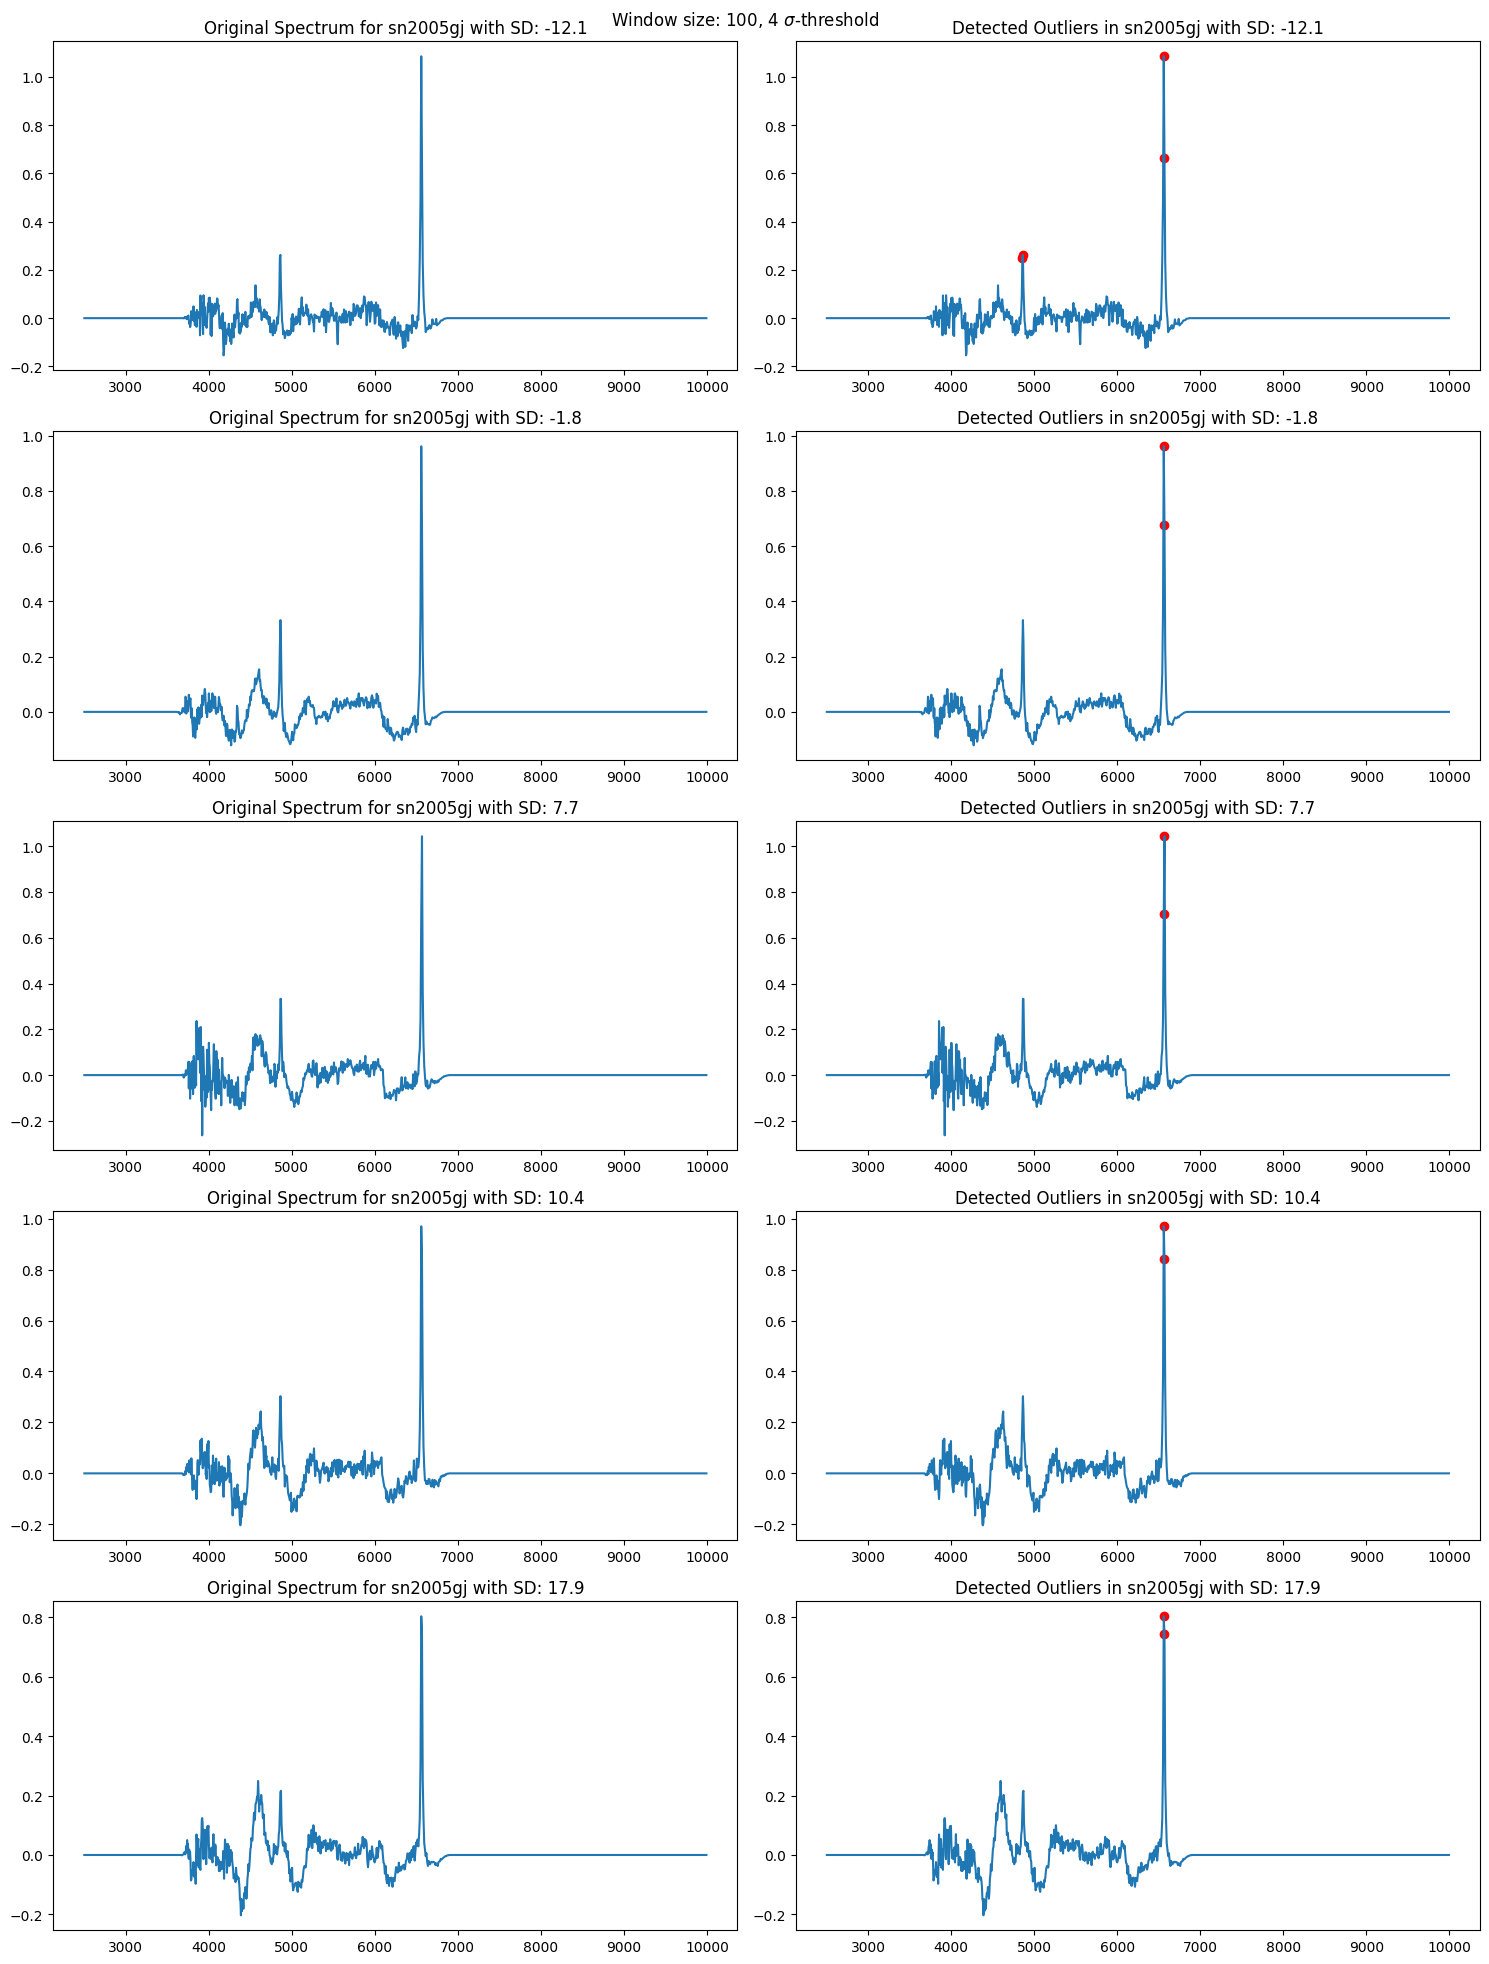

In [15]:
# --Calculate the number of outliers per spectra using a window size of 100 and
# --sigma threshold of 4
window_size = 100
sigma_threshold = 4

outliers_per_spectrum = []
outliers_indx_per_spectrum = []
z_scores_per_spectrum = []
values_per_spectrum = []
spectrum_index = []

for i in range(len(df_raw)):
    test_spectrum = df_raw.iloc[i,5:].values
    indices, z_scores, values = detect_outliers(test_spectrum,
                                                window_size=window_size,
                                                sigma_threshold=sigma_threshold)
    outliers_per_spectrum.append(len(indices))
    outliers_indx_per_spectrum.append(indices)
    z_scores_per_spectrum.append(z_scores)
    values_per_spectrum.append(values)
    spectrum_index.append(i)

# --Count number of spectra with outliers
spectrum_index = np.array(spectrum_index)
outliers_per_spectrum = np.array(outliers_per_spectrum)
num_of_spectra = len(spectrum_index[outliers_per_spectrum > 0])
num_of_spectra_array.append(num_of_spectra)
print(f'Number of spectra with outliers: {num_of_spectra}')
spectra_with_outliers = spectrum_index[outliers_per_spectrum > 0]

# --Create subplots for the first 5 indices in spectra_with_outliers
fig, ax = plt.subplots(5, 2, figsize=(15, 20))

# --Add figure title
fig.suptitle(r'Window size: {0}, {1} $\sigma$-threshold'.format(window_size,
                                                                   sigma_threshold))

# --Loop through the first 5 indices in spectra_with_outliers
for idx, i in enumerate(spectra_with_outliers[:5]):
    spectrum = df_raw.iloc[i, 5:].values
    name = df_raw.index[i]
    delay = df_raw['Spectral Phase'][i]

    # --Plot original spectrum
    ax[idx, 0].plot(wavelength, spectrum)
    ax[idx, 0].set_title(f'Original Spectrum for {name} with SD: {delay}')

    # --Detect outliers (modify indices detection as per your existing logic)
    indices = outliers_indx_per_spectrum[i]

    # --Plot spectrum with detected outliers
    ax[idx, 1].plot(wavelength, spectrum)
    ax[idx, 1].scatter(wavelength[indices], spectrum[indices], color='red')
    ax[idx, 1].set_title(f'Detected Outliers in {name} with SD: {delay}')


# --Show the plots
plt.tight_layout()
plt.show()

#### Window: 100, sigma: 5

Number of spectra with outliers: 148


<ipython-input-16-fbbf1d092f78>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delay = df_raw['Spectral Phase'][i]


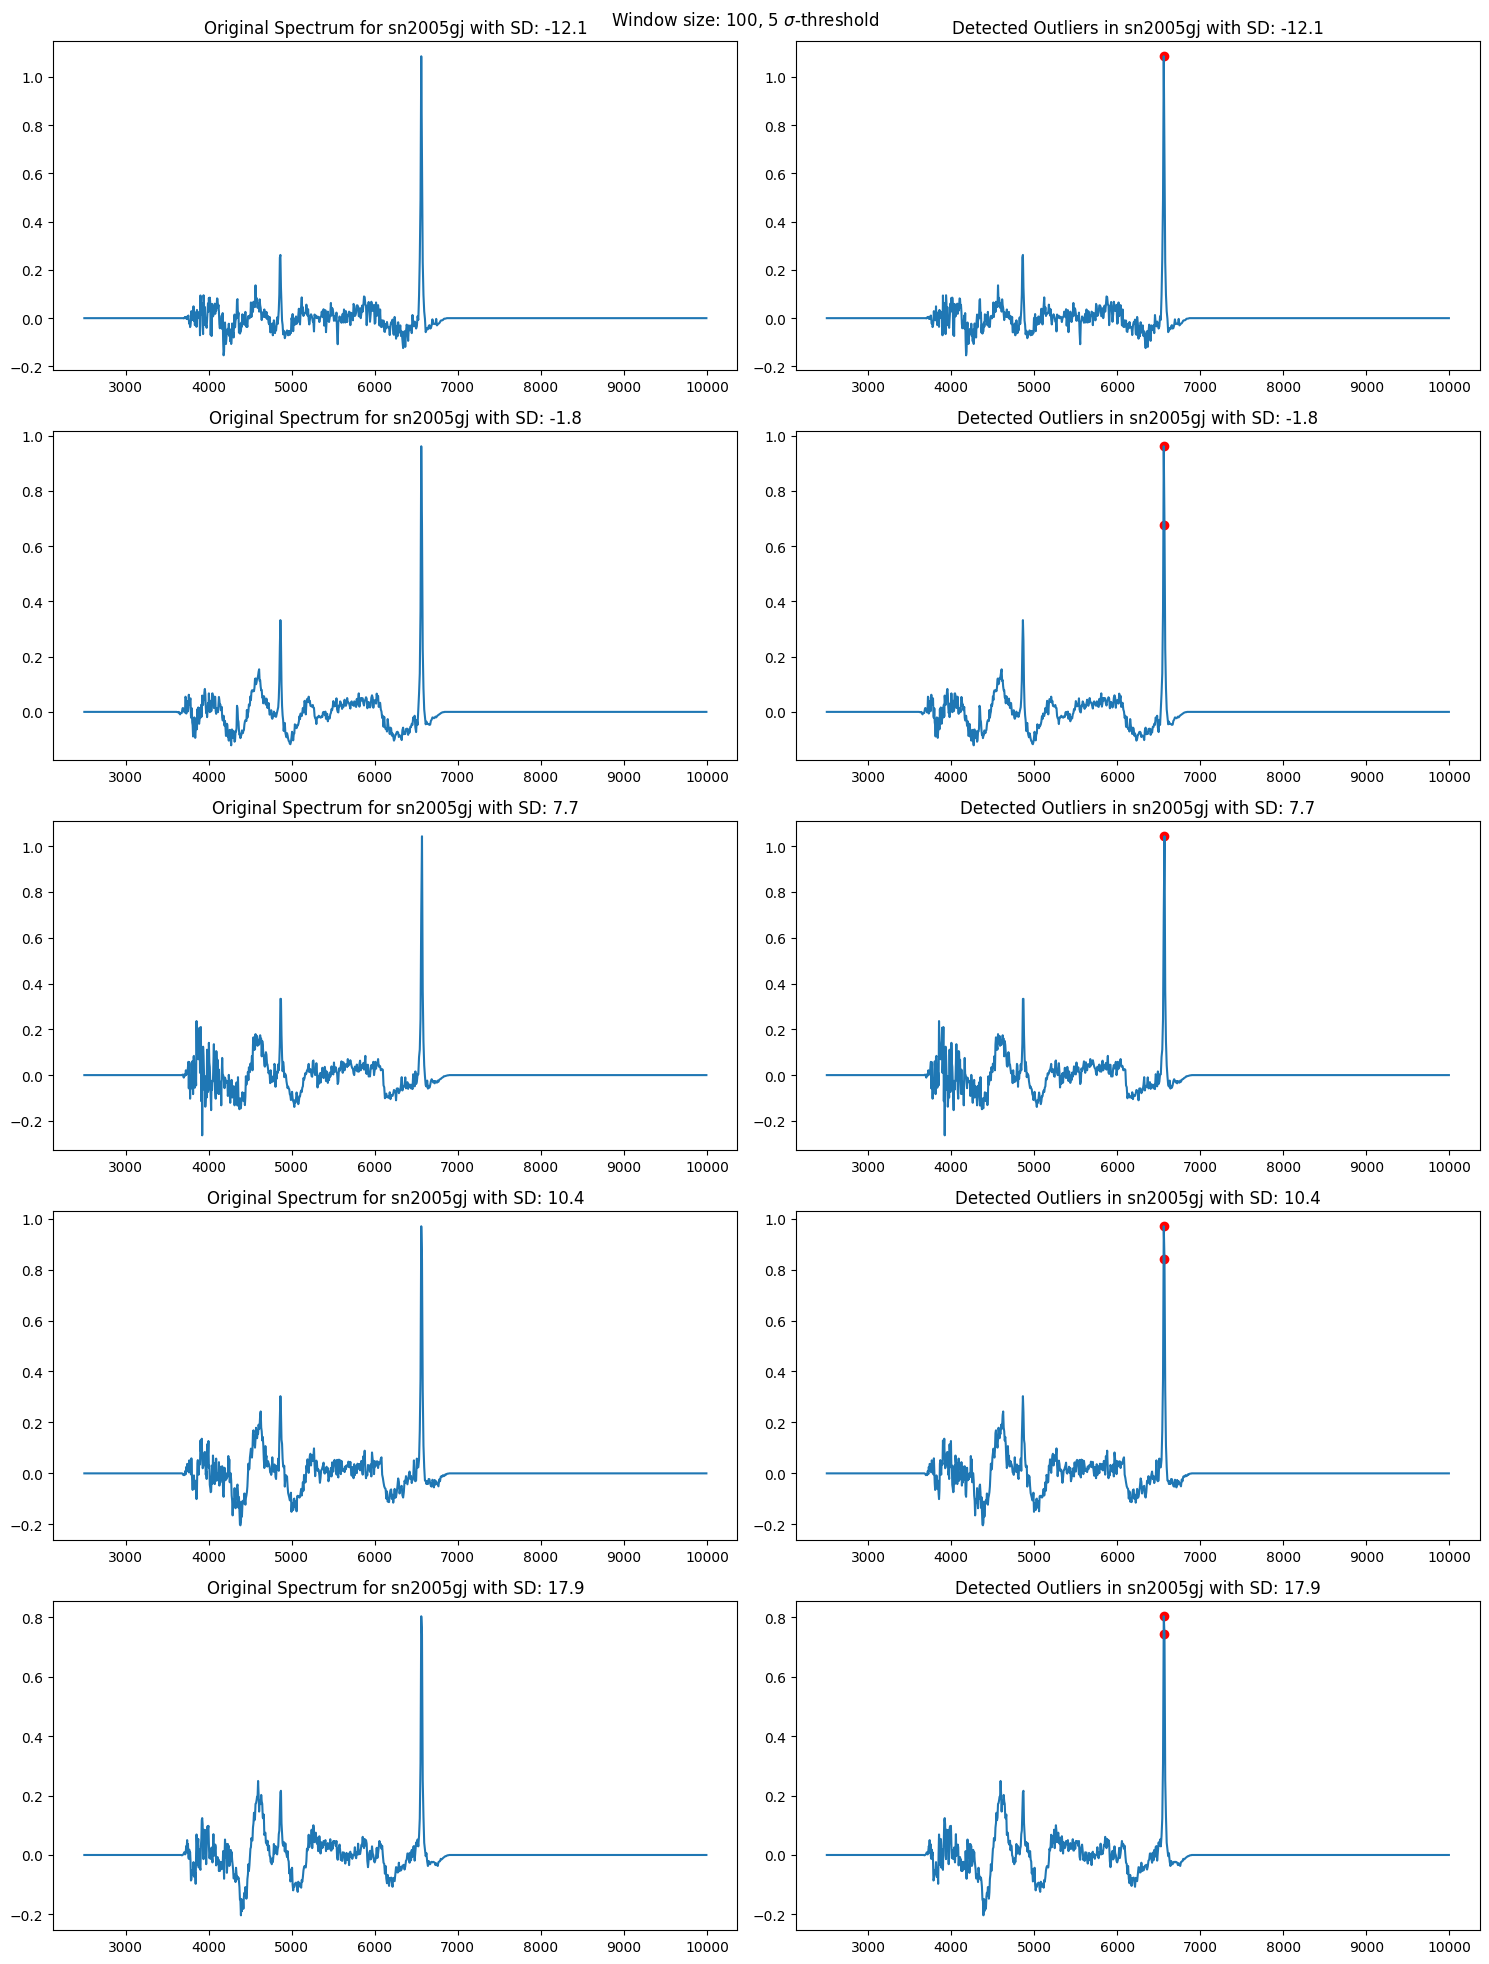

In [16]:
# --Calculate the number of outliers per spectra using a window size of 100 and
# --sigma threshold of 5
window_size = 100
sigma_threshold = 5

outliers_per_spectrum = []
outliers_indx_per_spectrum = []
z_scores_per_spectrum = []
values_per_spectrum = []
spectrum_index = []

for i in range(len(df_raw)):
    test_spectrum = df_raw.iloc[i,5:].values
    indices, z_scores, values = detect_outliers(test_spectrum,
                                                window_size=window_size,
                                                sigma_threshold=sigma_threshold)
    outliers_per_spectrum.append(len(indices))
    outliers_indx_per_spectrum.append(indices)
    z_scores_per_spectrum.append(z_scores)
    values_per_spectrum.append(values)
    spectrum_index.append(i)

# --Count number of spectra with outliers
spectrum_index = np.array(spectrum_index)
outliers_per_spectrum = np.array(outliers_per_spectrum)
num_of_spectra = len(spectrum_index[outliers_per_spectrum > 0])
num_of_spectra_array.append(num_of_spectra)
print(f'Number of spectra with outliers: {num_of_spectra}')
spectra_with_outliers = spectrum_index[outliers_per_spectrum > 0]

# --Create subplots for the first 5 indices in spectra_with_outliers
fig, ax = plt.subplots(5, 2, figsize=(15, 20))

# --Add figure title
fig.suptitle(r'Window size: {0}, {1} $\sigma$-threshold'.format(window_size,
                                                                   sigma_threshold))

# --Loop through the first 5 indices in spectra_with_outliers
for idx, i in enumerate(spectra_with_outliers[:5]):
    spectrum = df_raw.iloc[i, 5:].values
    name = df_raw.index[i]
    delay = df_raw['Spectral Phase'][i]

    # --Plot original spectrum
    ax[idx, 0].plot(wavelength, spectrum)
    ax[idx, 0].set_title(f'Original Spectrum for {name} with SD: {delay}')

    # --Detect outliers (modify indices detection as per your existing logic)
    indices = outliers_indx_per_spectrum[i]

    # --Plot spectrum with detected outliers
    ax[idx, 1].plot(wavelength, spectrum)
    ax[idx, 1].scatter(wavelength[indices], spectrum[indices], color='red')
    ax[idx, 1].set_title(f'Detected Outliers in {name} with SD: {delay}')


# --Show the plots
plt.tight_layout()
plt.show()

#### Window: 150, sigma: 3

Number of spectra with outliers: 2721


<ipython-input-17-073f2f67cab4>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delay = df_raw['Spectral Phase'][i]


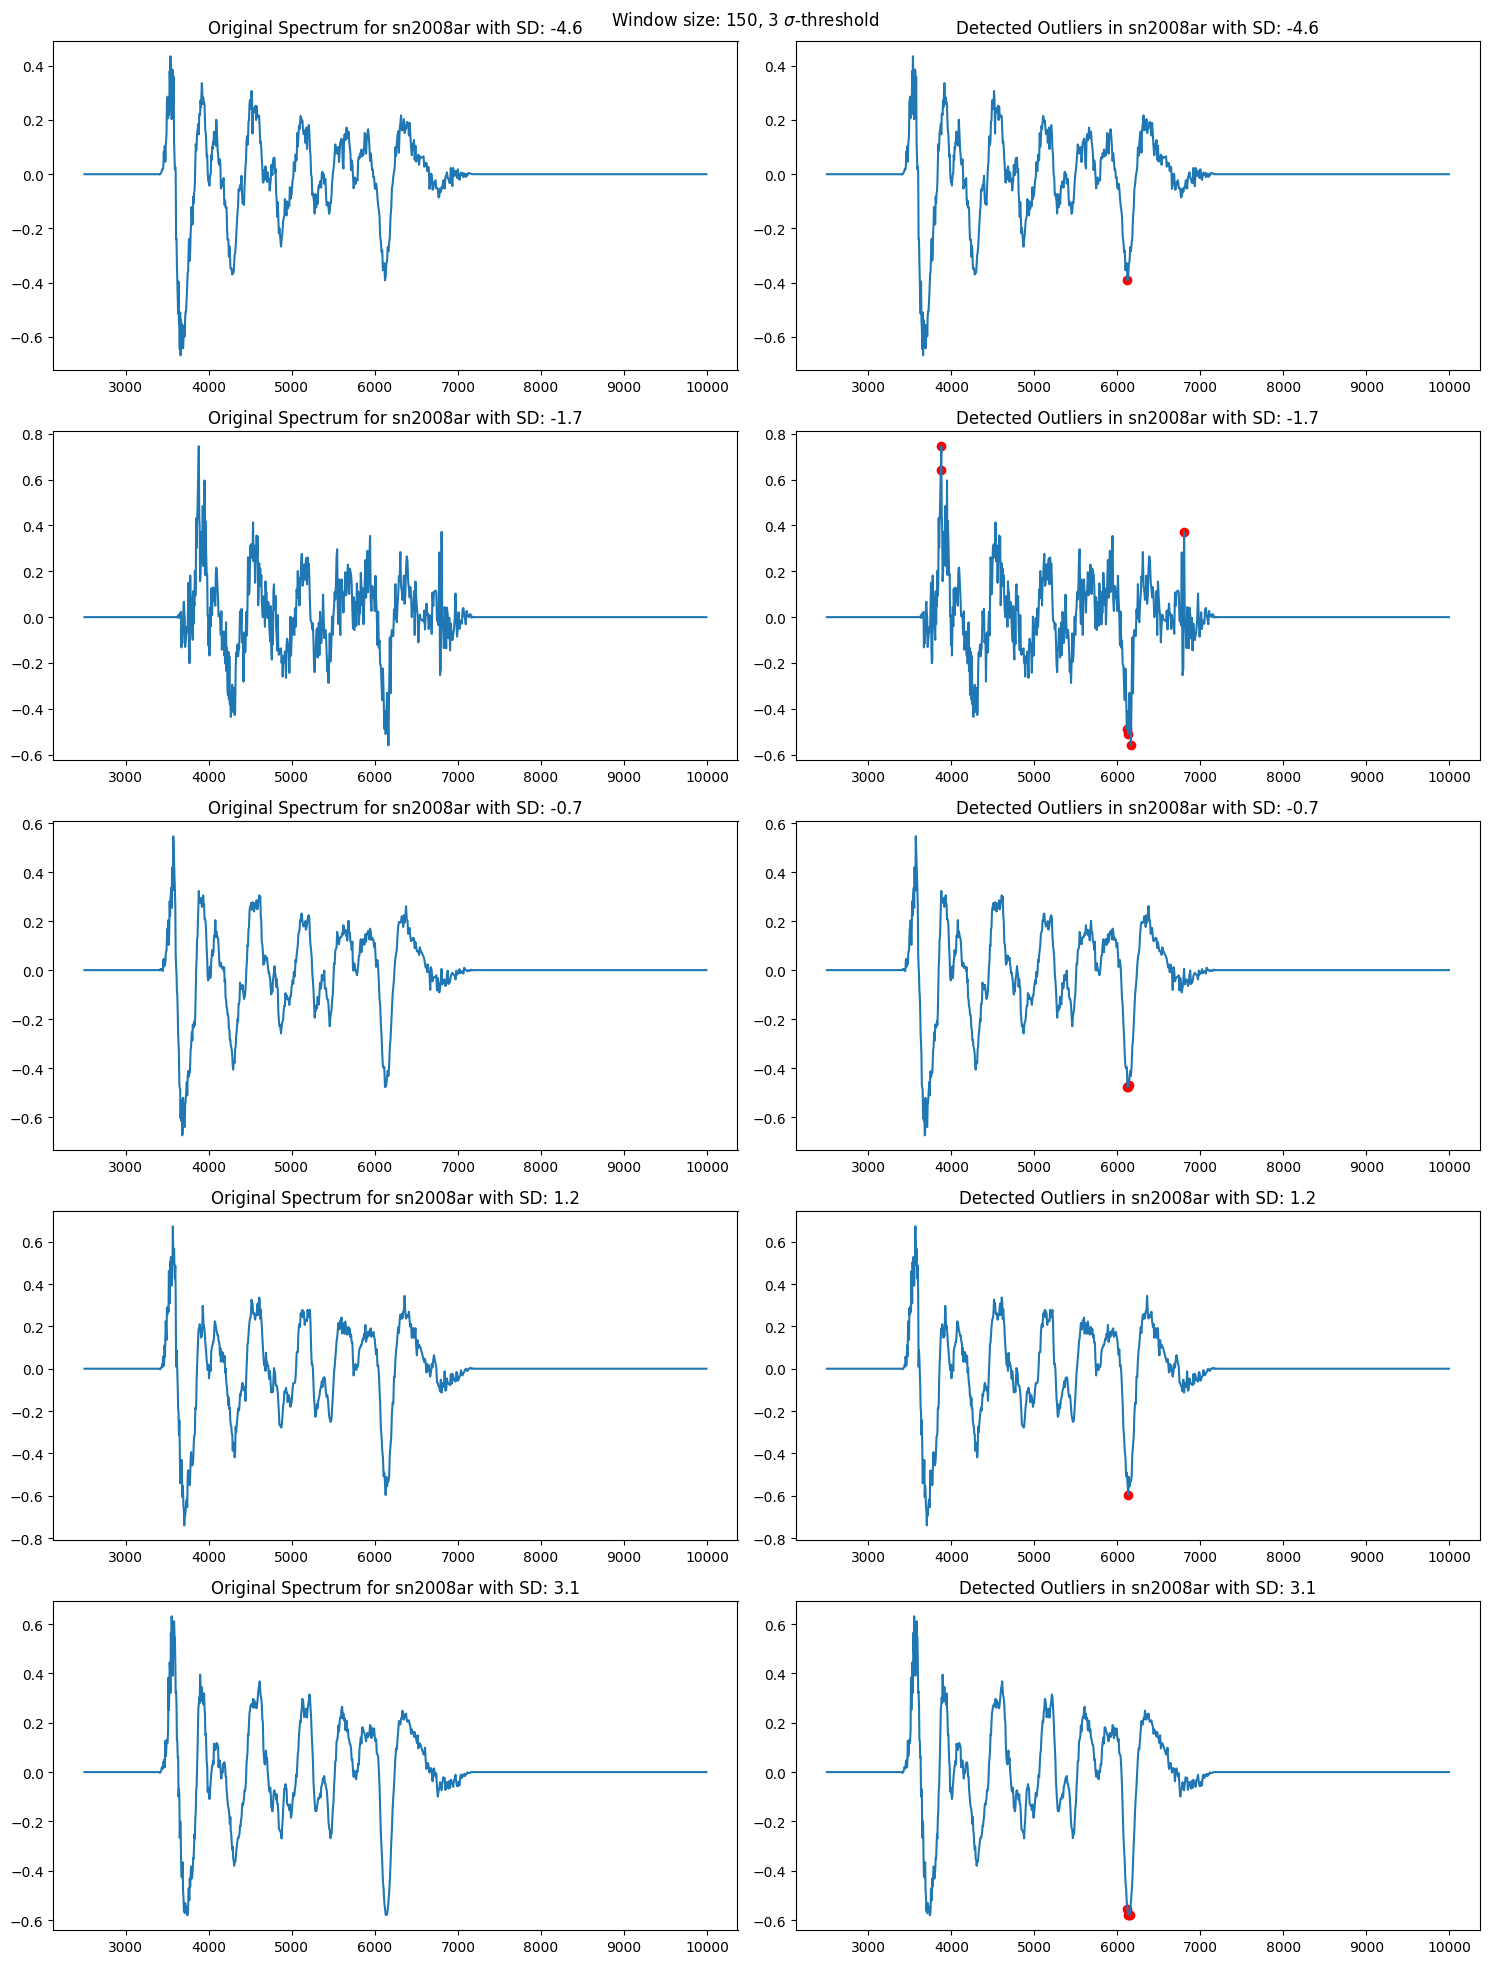

In [17]:
# --Calculate the number of outliers per spectra using a window size of 150 and
# --sigma threshold of 3
window_size = 150
sigma_threshold = 3

outliers_per_spectrum = []
outliers_indx_per_spectrum = []
z_scores_per_spectrum = []
values_per_spectrum = []
spectrum_index = []

for i in range(len(df_raw)):
    test_spectrum = df_raw.iloc[i,5:].values
    indices, z_scores, values = detect_outliers(test_spectrum,
                                                window_size=window_size,
                                                sigma_threshold=sigma_threshold)
    outliers_per_spectrum.append(len(indices))
    outliers_indx_per_spectrum.append(indices)
    z_scores_per_spectrum.append(z_scores)
    values_per_spectrum.append(values)
    spectrum_index.append(i)

# --Count number of spectra with outliers
spectrum_index = np.array(spectrum_index)
outliers_per_spectrum = np.array(outliers_per_spectrum)
num_of_spectra = len(spectrum_index[outliers_per_spectrum > 0])
num_of_spectra_array.append(num_of_spectra)
print(f'Number of spectra with outliers: {num_of_spectra}')
spectra_with_outliers = spectrum_index[outliers_per_spectrum > 0]

# --Create subplots for the first 5 indices in spectra_with_outliers
fig, ax = plt.subplots(5, 2, figsize=(15, 20))

# --Add figure title
fig.suptitle(r'Window size: {0}, {1} $\sigma$-threshold'.format(window_size,
                                                                   sigma_threshold))

# --Loop through the first 5 indices in spectra_with_outliers
for idx, i in enumerate(spectra_with_outliers[:5]):
    spectrum = df_raw.iloc[i, 5:].values
    name = df_raw.index[i]
    delay = df_raw['Spectral Phase'][i]

    # --Plot original spectrum
    ax[idx, 0].plot(wavelength, spectrum)
    ax[idx, 0].set_title(f'Original Spectrum for {name} with SD: {delay}')

    # --Detect outliers (modify indices detection as per your existing logic)
    indices = outliers_indx_per_spectrum[i]

    # --Plot spectrum with detected outliers
    ax[idx, 1].plot(wavelength, spectrum)
    ax[idx, 1].scatter(wavelength[indices], spectrum[indices], color='red')
    ax[idx, 1].set_title(f'Detected Outliers in {name} with SD: {delay}')


# --Show the plots
plt.tight_layout()
plt.show()

#### Window: 150, sigma: 4

Number of spectra with outliers: 673


<ipython-input-18-861540a9e35e>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delay = df_raw['Spectral Phase'][i]


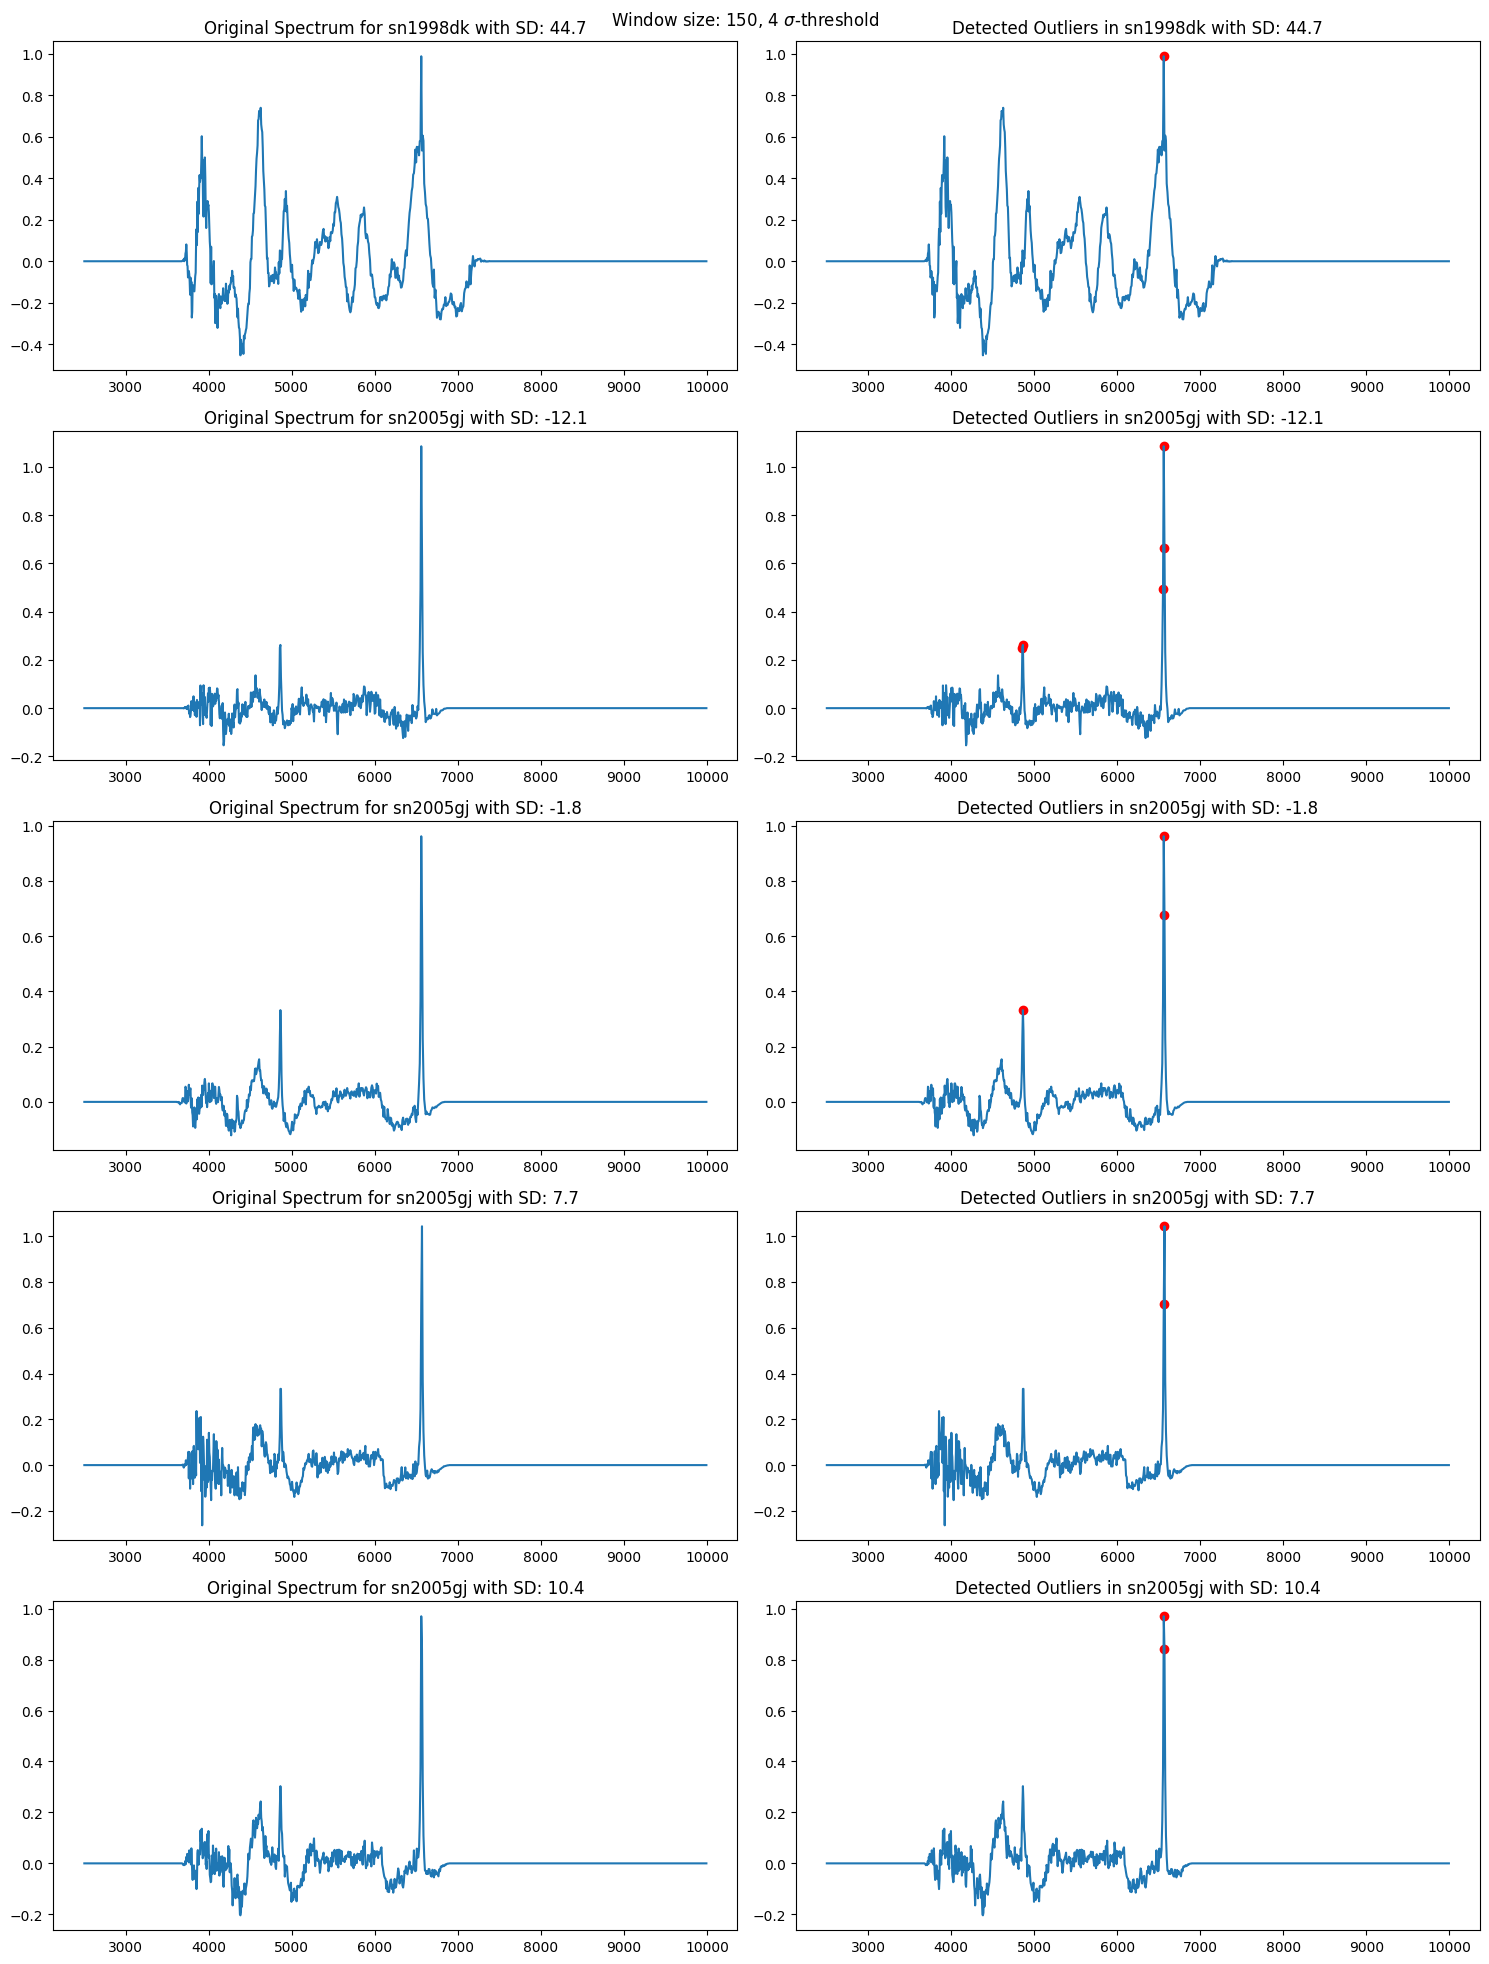

In [18]:
# --Calculate the number of outliers per spectra using a window size of 150 and
# --sigma threshold of 4
window_size = 150
sigma_threshold = 4

outliers_per_spectrum = []
outliers_indx_per_spectrum = []
z_scores_per_spectrum = []
values_per_spectrum = []
spectrum_index = []

for i in range(len(df_raw)):
    test_spectrum = df_raw.iloc[i,5:].values
    indices, z_scores, values = detect_outliers(test_spectrum,
                                                window_size=window_size,
                                                sigma_threshold=sigma_threshold)
    outliers_per_spectrum.append(len(indices))
    outliers_indx_per_spectrum.append(indices)
    z_scores_per_spectrum.append(z_scores)
    values_per_spectrum.append(values)
    spectrum_index.append(i)

# --Count number of spectra with outliers
spectrum_index = np.array(spectrum_index)
outliers_per_spectrum = np.array(outliers_per_spectrum)
num_of_spectra = len(spectrum_index[outliers_per_spectrum > 0])
num_of_spectra_array.append(num_of_spectra)
print(f'Number of spectra with outliers: {num_of_spectra}')
spectra_with_outliers = spectrum_index[outliers_per_spectrum > 0]

# --Create subplots for the first 5 indices in spectra_with_outliers
fig, ax = plt.subplots(5, 2, figsize=(15, 20))

# --Add figure title
fig.suptitle(r'Window size: {0}, {1} $\sigma$-threshold'.format(window_size,
                                                                   sigma_threshold))

# --Loop through the first 5 indices in spectra_with_outliers
for idx, i in enumerate(spectra_with_outliers[:5]):
    spectrum = df_raw.iloc[i, 5:].values
    name = df_raw.index[i]
    delay = df_raw['Spectral Phase'][i]

    # --Plot original spectrum
    ax[idx, 0].plot(wavelength, spectrum)
    ax[idx, 0].set_title(f'Original Spectrum for {name} with SD: {delay}')

    # --Detect outliers (modify indices detection as per your existing logic)
    indices = outliers_indx_per_spectrum[i]

    # --Plot spectrum with detected outliers
    ax[idx, 1].plot(wavelength, spectrum)
    ax[idx, 1].scatter(wavelength[indices], spectrum[indices], color='red')
    ax[idx, 1].set_title(f'Detected Outliers in {name} with SD: {delay}')


# --Show the plots
plt.tight_layout()
plt.show()

#### Window: 150, sigma: 5

Number of spectra with outliers: 224


<ipython-input-19-68ff56c67181>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delay = df_raw['Spectral Phase'][i]


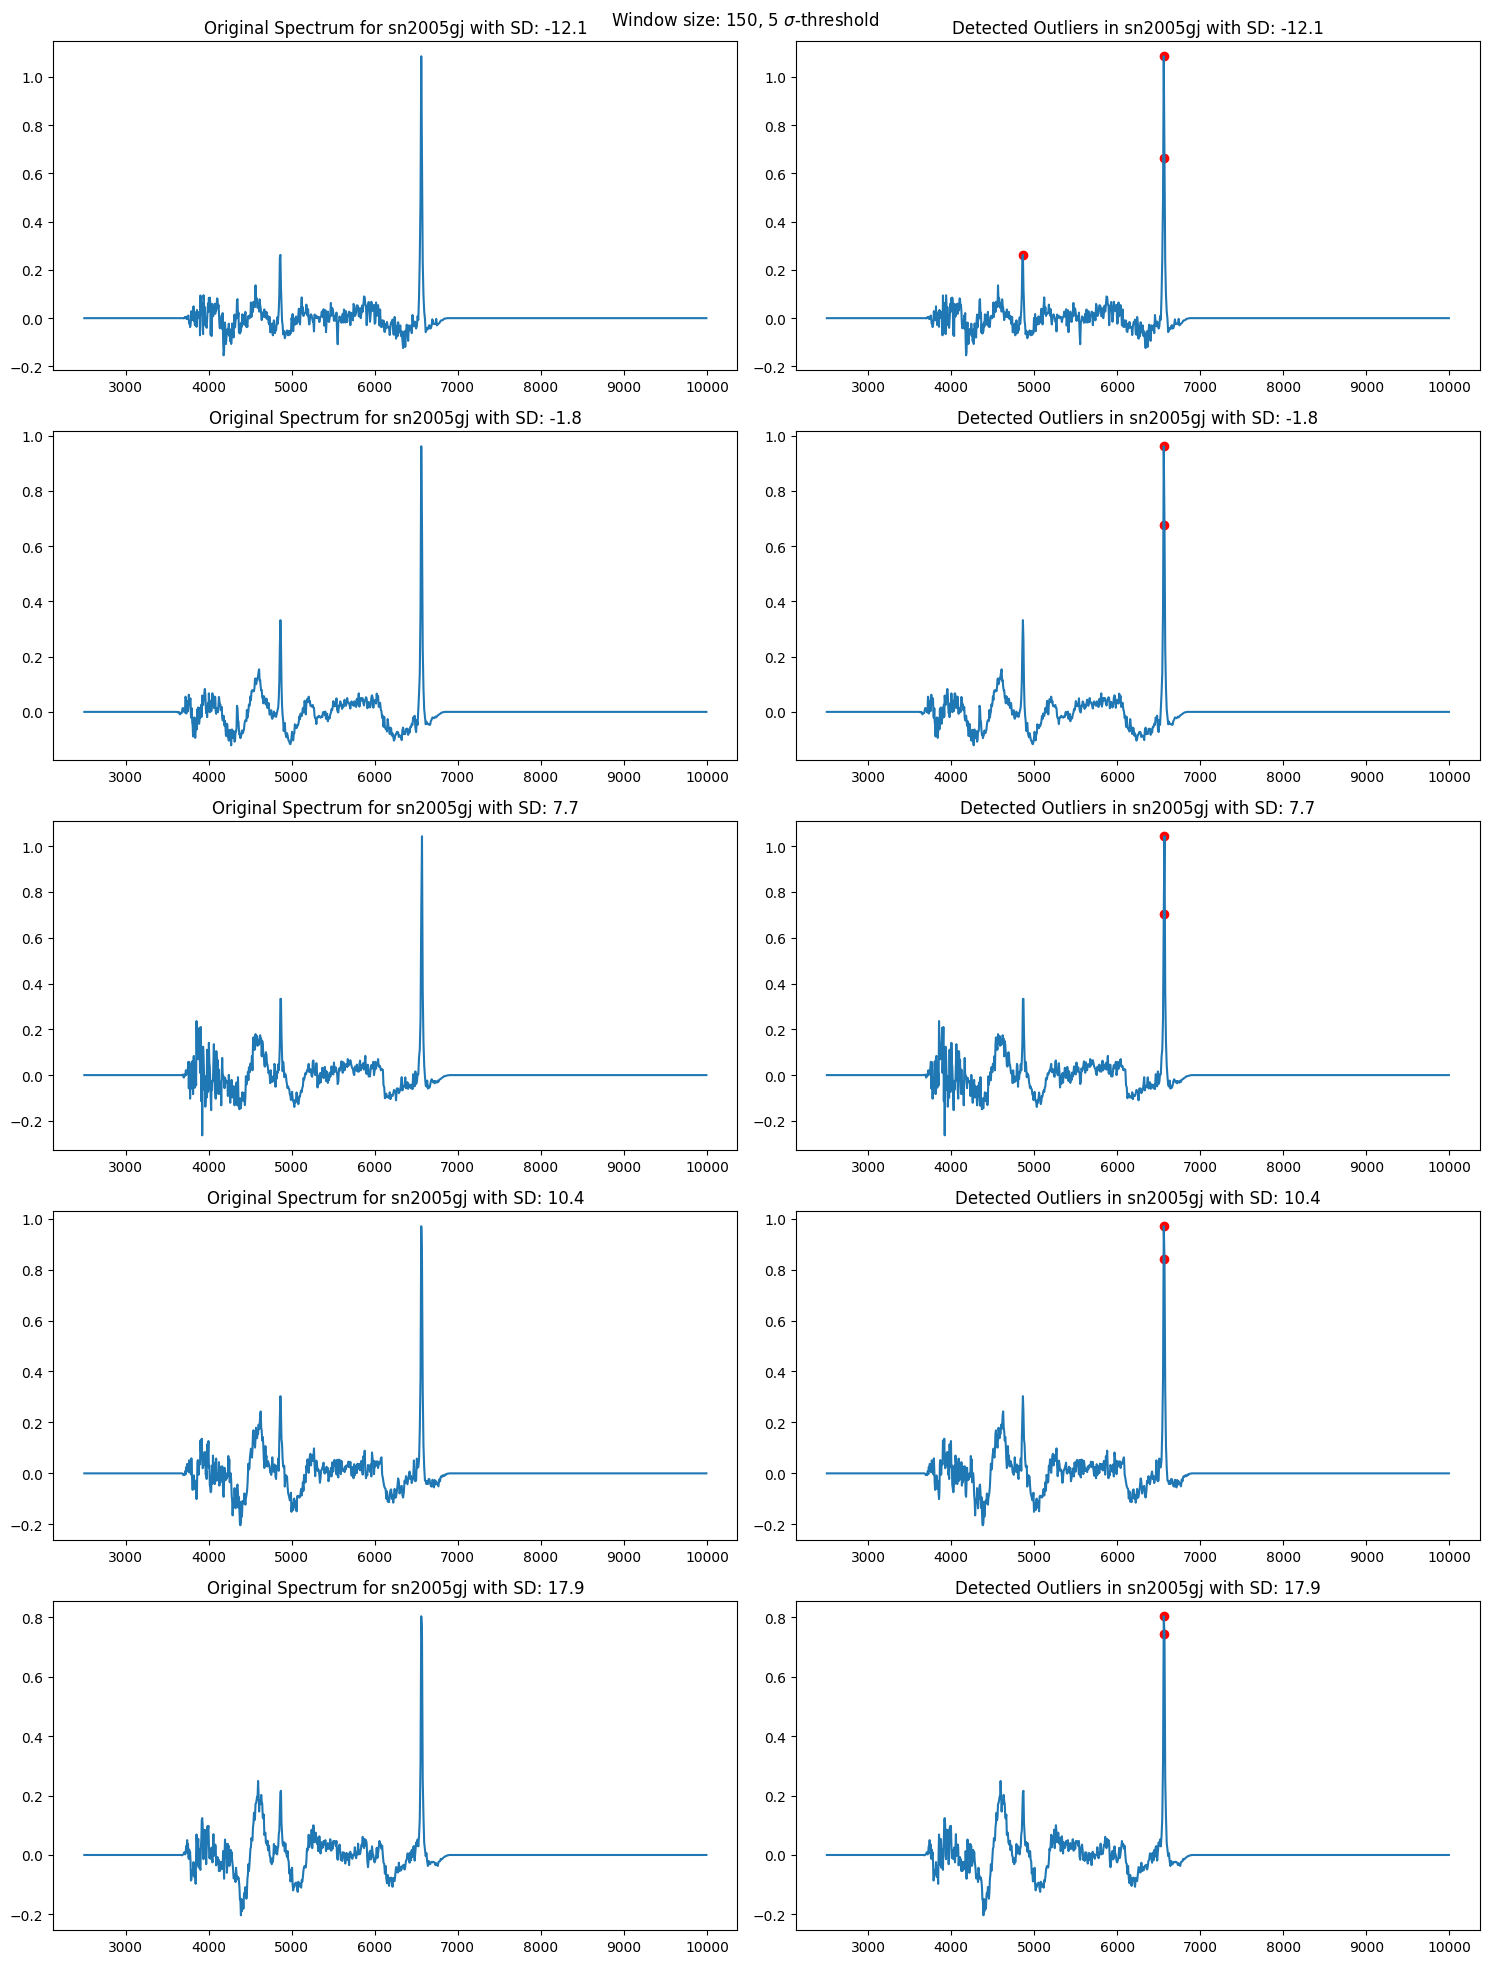

In [19]:
# --Calculate the number of outliers per spectra using a window size of 150 and
# --sigma threshold of 4
window_size = 150
sigma_threshold = 5

outliers_per_spectrum = []
outliers_indx_per_spectrum = []
z_scores_per_spectrum = []
values_per_spectrum = []
spectrum_index = []

for i in range(len(df_raw)):
    test_spectrum = df_raw.iloc[i,5:].values
    indices, z_scores, values = detect_outliers(test_spectrum,
                                                window_size=window_size,
                                                sigma_threshold=sigma_threshold)
    outliers_per_spectrum.append(len(indices))
    outliers_indx_per_spectrum.append(indices)
    z_scores_per_spectrum.append(z_scores)
    values_per_spectrum.append(values)
    spectrum_index.append(i)

# --Count number of spectra with outliers
spectrum_index = np.array(spectrum_index)
outliers_per_spectrum = np.array(outliers_per_spectrum)
num_of_spectra = len(spectrum_index[outliers_per_spectrum > 0])
num_of_spectra_array.append(num_of_spectra)
print(f'Number of spectra with outliers: {num_of_spectra}')
spectra_with_outliers = spectrum_index[outliers_per_spectrum > 0]

# --Create subplots for the first 5 indices in spectra_with_outliers
fig, ax = plt.subplots(5, 2, figsize=(15, 20))

# --Add figure title
fig.suptitle(r'Window size: {0}, {1} $\sigma$-threshold'.format(window_size,
                                                                   sigma_threshold))

# --Loop through the first 5 indices in spectra_with_outliers
for idx, i in enumerate(spectra_with_outliers[:5]):
    spectrum = df_raw.iloc[i, 5:].values
    name = df_raw.index[i]
    delay = df_raw['Spectral Phase'][i]

    # --Plot original spectrum
    ax[idx, 0].plot(wavelength, spectrum)
    ax[idx, 0].set_title(f'Original Spectrum for {name} with SD: {delay}')

    # --Detect outliers (modify indices detection as per your existing logic)
    indices = outliers_indx_per_spectrum[i]

    # --Plot spectrum with detected outliers
    ax[idx, 1].plot(wavelength, spectrum)
    ax[idx, 1].scatter(wavelength[indices], spectrum[indices], color='red')
    ax[idx, 1].set_title(f'Detected Outliers in {name} with SD: {delay}')


# --Show the plots
plt.tight_layout()
plt.show()

#### Interpreting results

In [20]:
# --Create Pandas DataFrame to visualize comparison
num_of_spectra_array = np.array(num_of_spectra_array).reshape(3,3)
num_of_spectra_array = pd.DataFrame(num_of_spectra_array, index=[50, 100, 150], columns=['3', '4', '5'])
num_of_spectra_array

,3,4,5
50,1049,224,51
100,1539,414,148
150,2721,673,224
